In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optik2 as optik

In [ ]:
capa1 = optik.lego('GaAs')
capa2 = optik.lego('InGaP')
capa3 = optik.lego('AlGaAs')
capa4 = optik.lego('Si')

In [4]:
cell = optik.lego_tower(capa1,capa2,capa3,capa4)

Thicknes of GaAs:90
Thicknes of InGaP:55
Thicknes of AlGaAs:200
Thicknes of Si:1100


In [6]:
capa1.alpha

array([5.33173153, 5.32222755, 5.25238516, ..., 0.        , 0.        ,
       0.        ])

In [7]:
cell.calc_RT()

(array([6.60922777e-09, 6.86527772e-09, 7.99537333e-09, ...,
        1.10493008e-01, 1.10634045e-01, 1.10775422e-01]),
 array([6.77571302e-15, 7.26011309e-15, 1.08942421e-14, ...,
        3.29734526e+02, 3.29735142e+02, 3.29735756e+02]))

In [11]:
cell.T

array([6.77571302e-15, 7.26011309e-15, 1.08942421e-14, ...,
       3.29734526e+02, 3.29735142e+02, 3.29735756e+02])

Text(0.5, 1.0, 'Reflectance')

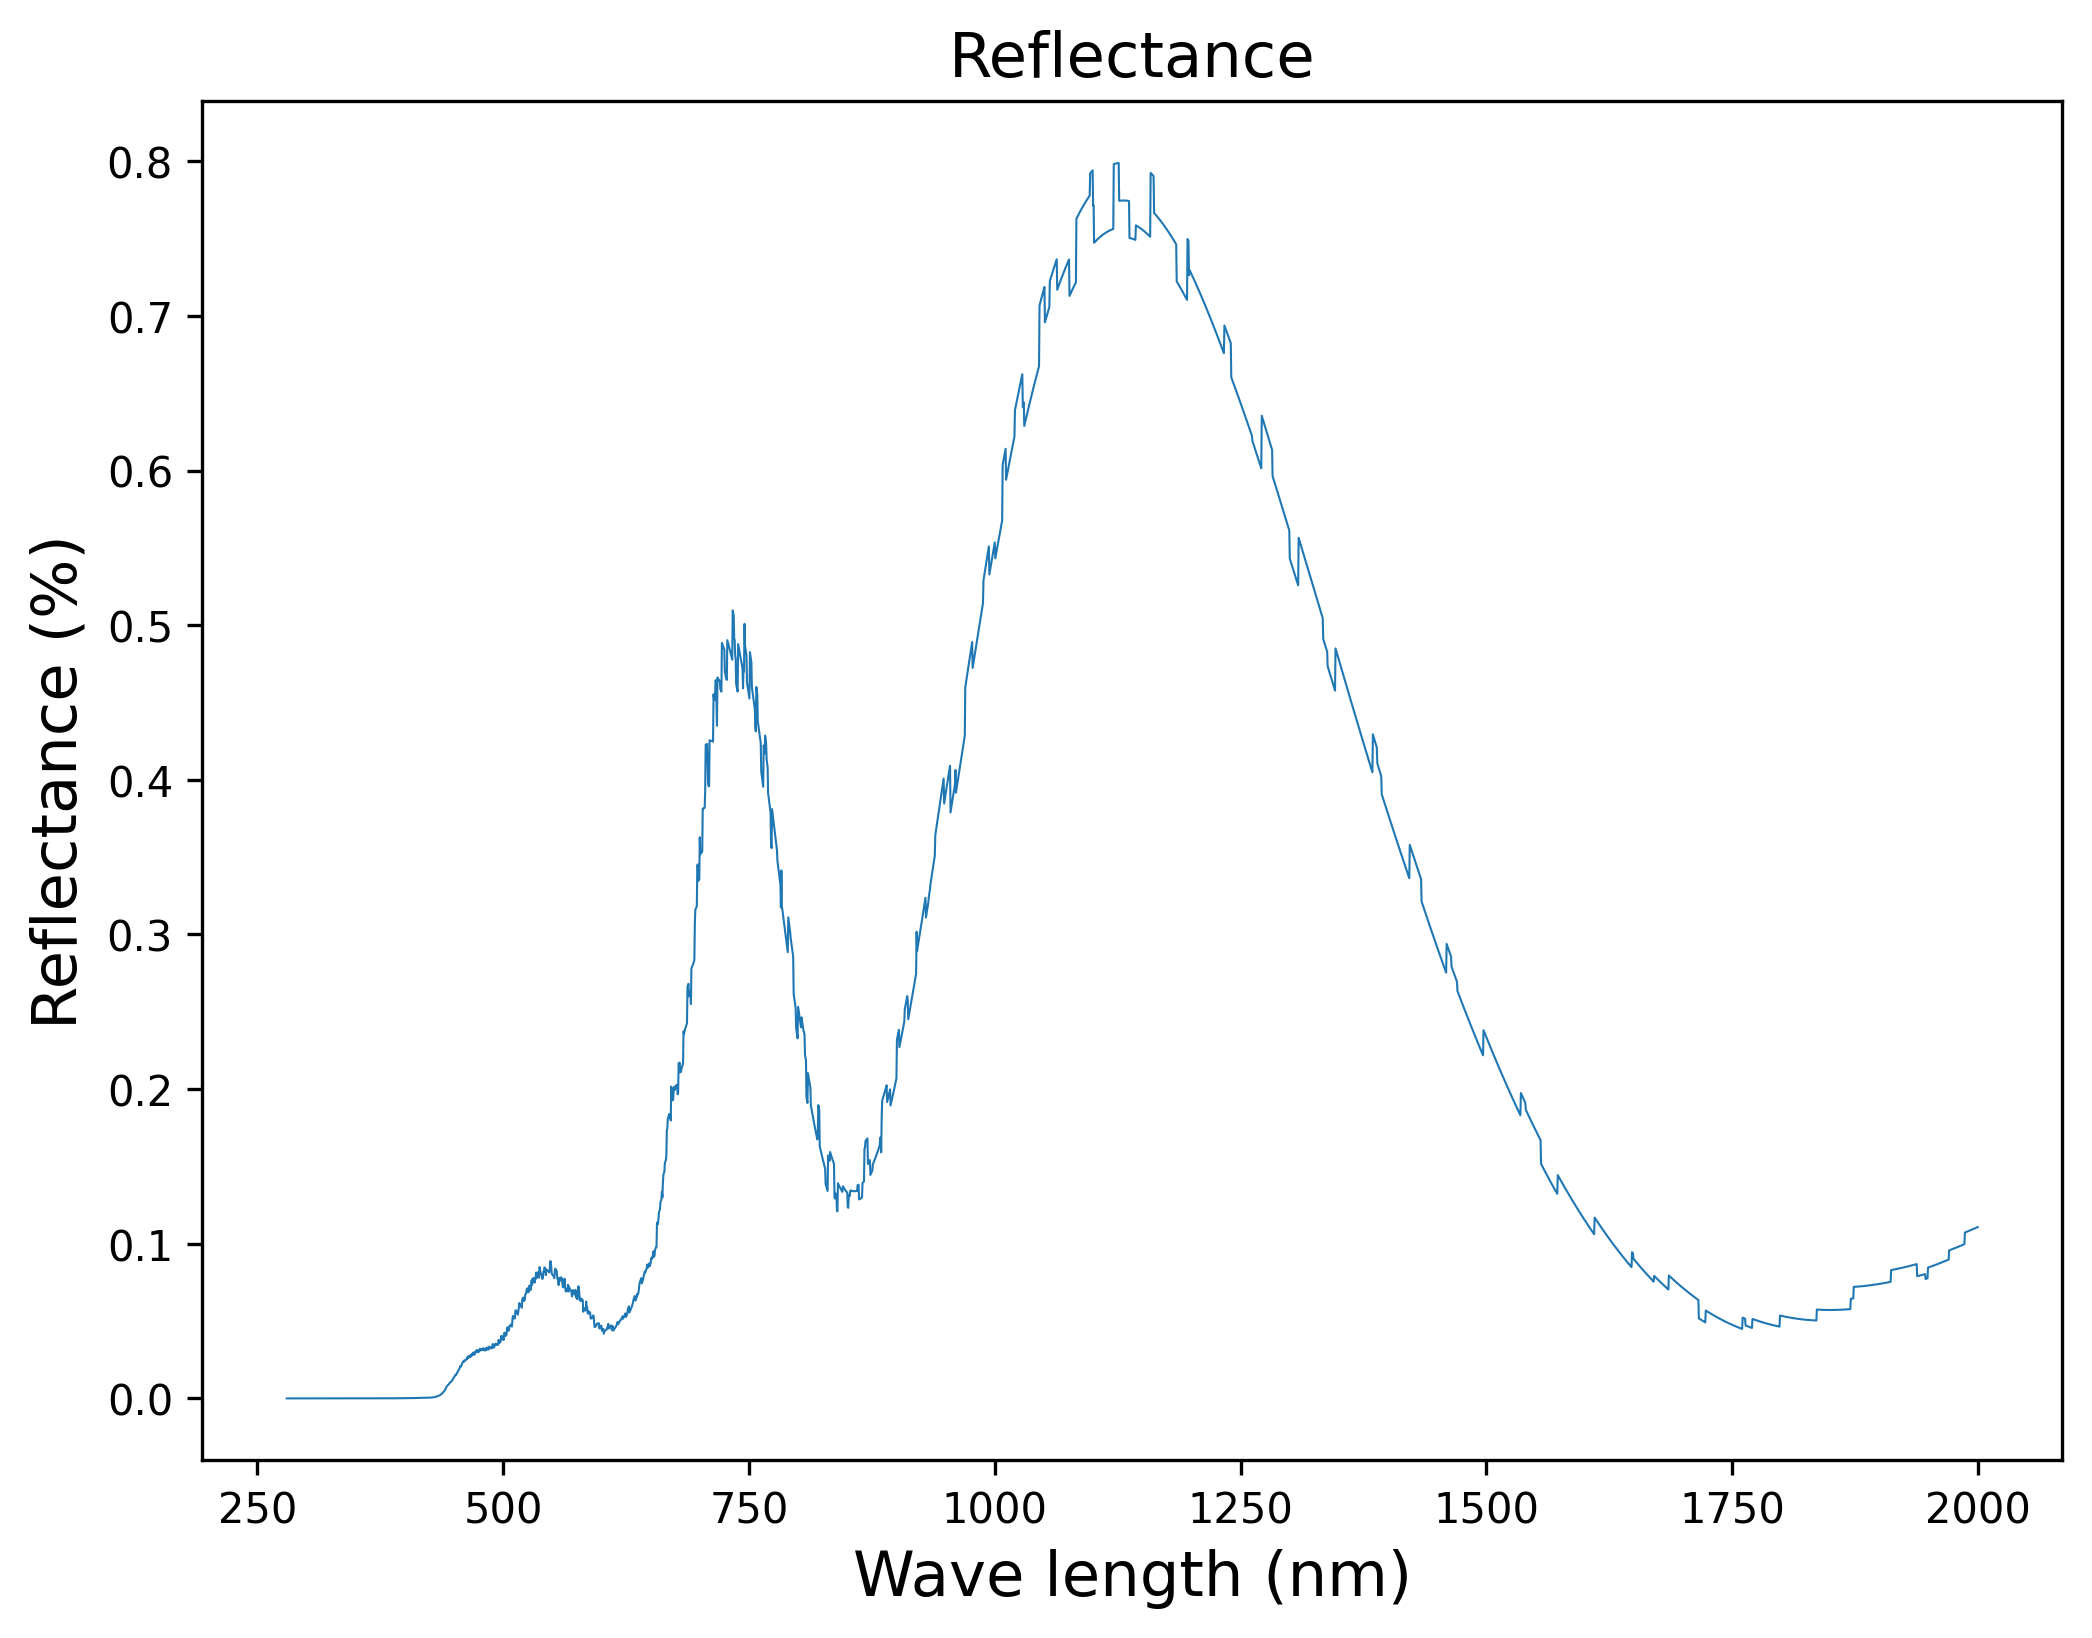

In [20]:
plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa1.lambd, cell.R, linewidth=0.5)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Reflectance (%)", {"fontsize": 15})
plt.title("Reflectance", {"fontsize": 15})
#plt.axis([280, 2000, 0, 100])

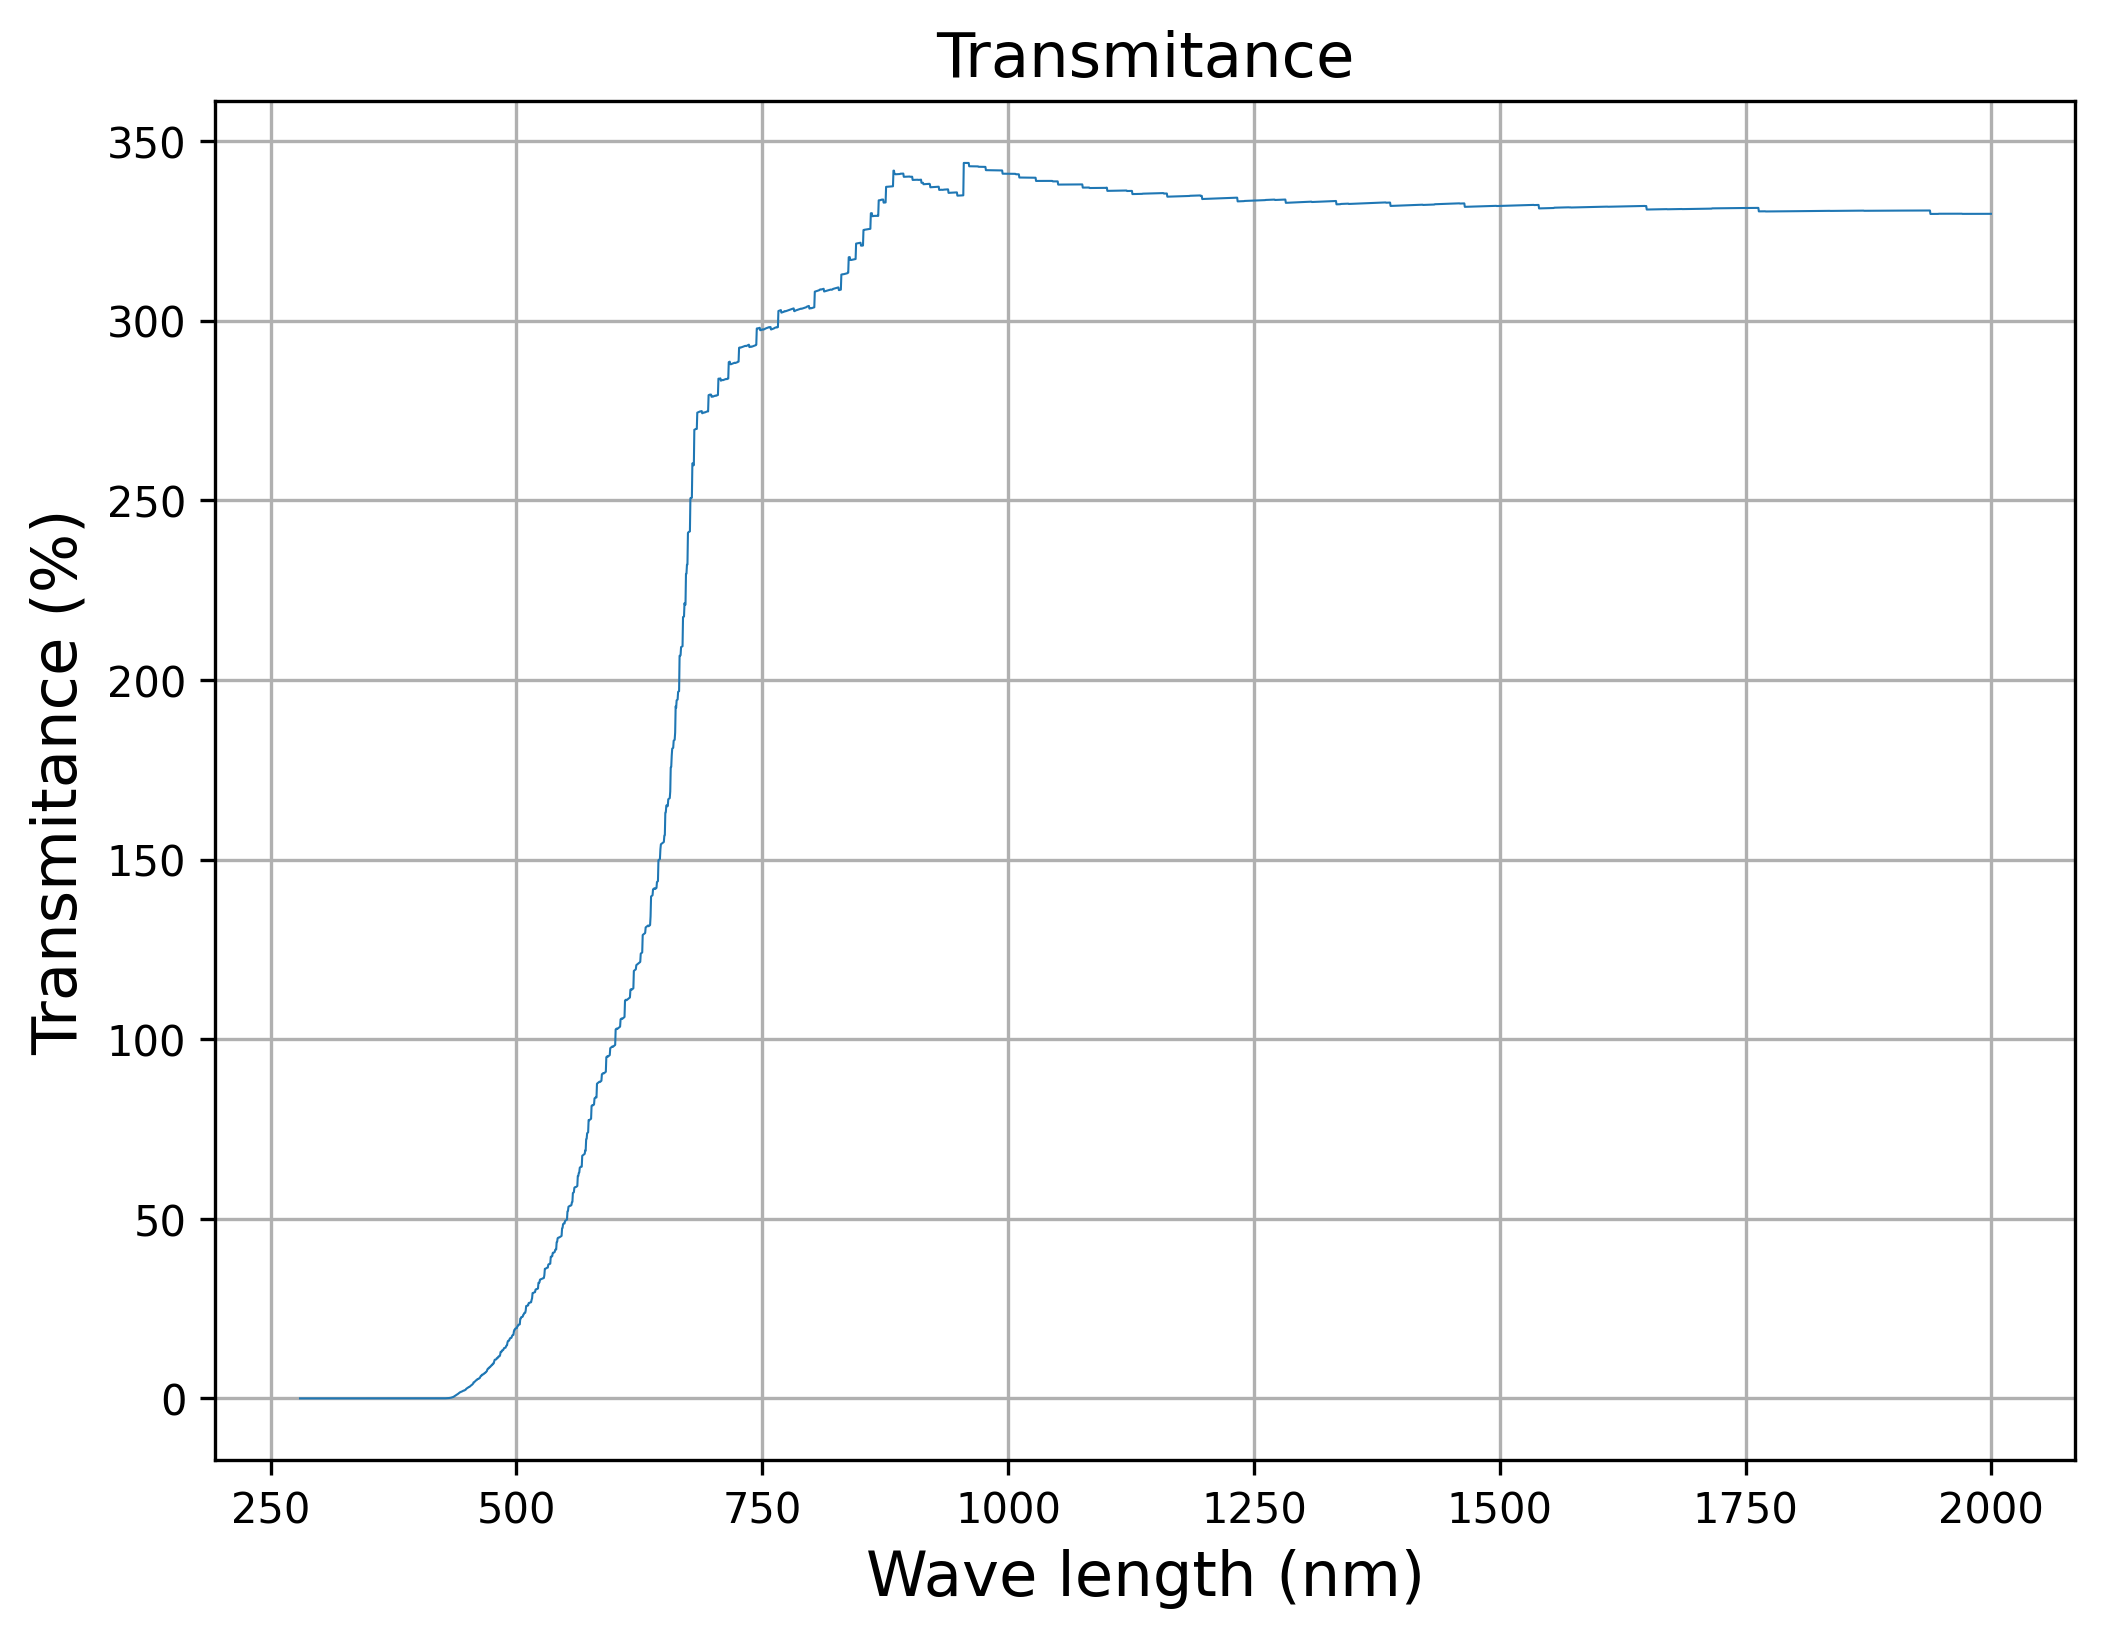

In [21]:
plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa1.lambd, cell.T, linewidth=0.5)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Transmitance (%)", {"fontsize": 15})
plt.title("Transmitance", {"fontsize": 15})
plt.grid(True)
#plt.axis([280, 2000, 0, 100])

### Files
* File Name: ./Materials/MgF2.txt
* File Name: ./Materials/ZnS.txt
* File Name: ./Materials/InGaP.txt
* File Name: ./Materials/GaAs.txt

### Thickness
* Thickness of MgF2:  97
* Thickness of ZnS:  41
* Thickness of InGaP:  200
* Thickness of GaAs:  1100

In [2]:
capa_MgF = optik.lego('MgF2')
capa_ZnS = optik.lego('ZnS')
capa_InGaP = optik.lego('InGaP')
capa_GaAs = optik.lego('GaAs')

File Name:./Materials/MgF2.txt
File Name:./Materials/ZnS.txt
File Name:./Materials/InGaP.txt
File Name:./Materials/GaAs.txt


In [3]:
cell2 = optik.lego_tower(capa_MgF,capa_ZnS,capa_InGaP,capa_GaAs)

Thickness of MgF2:97
Thickness of ZnS:41
Thickness of InGaP:200
Thickness of GaAs:1100


In [4]:
cell2.RT()

(array([19.03316807, 19.0213741 , 18.96908577, ..., 10.38220301,
        10.37938736, 10.37641802]),
 array([ 37.35115405,  37.41799788,  37.75784227, ..., 119.53008137,
        119.52876468, 119.52827712]))

In [5]:
cell2.only_two

False

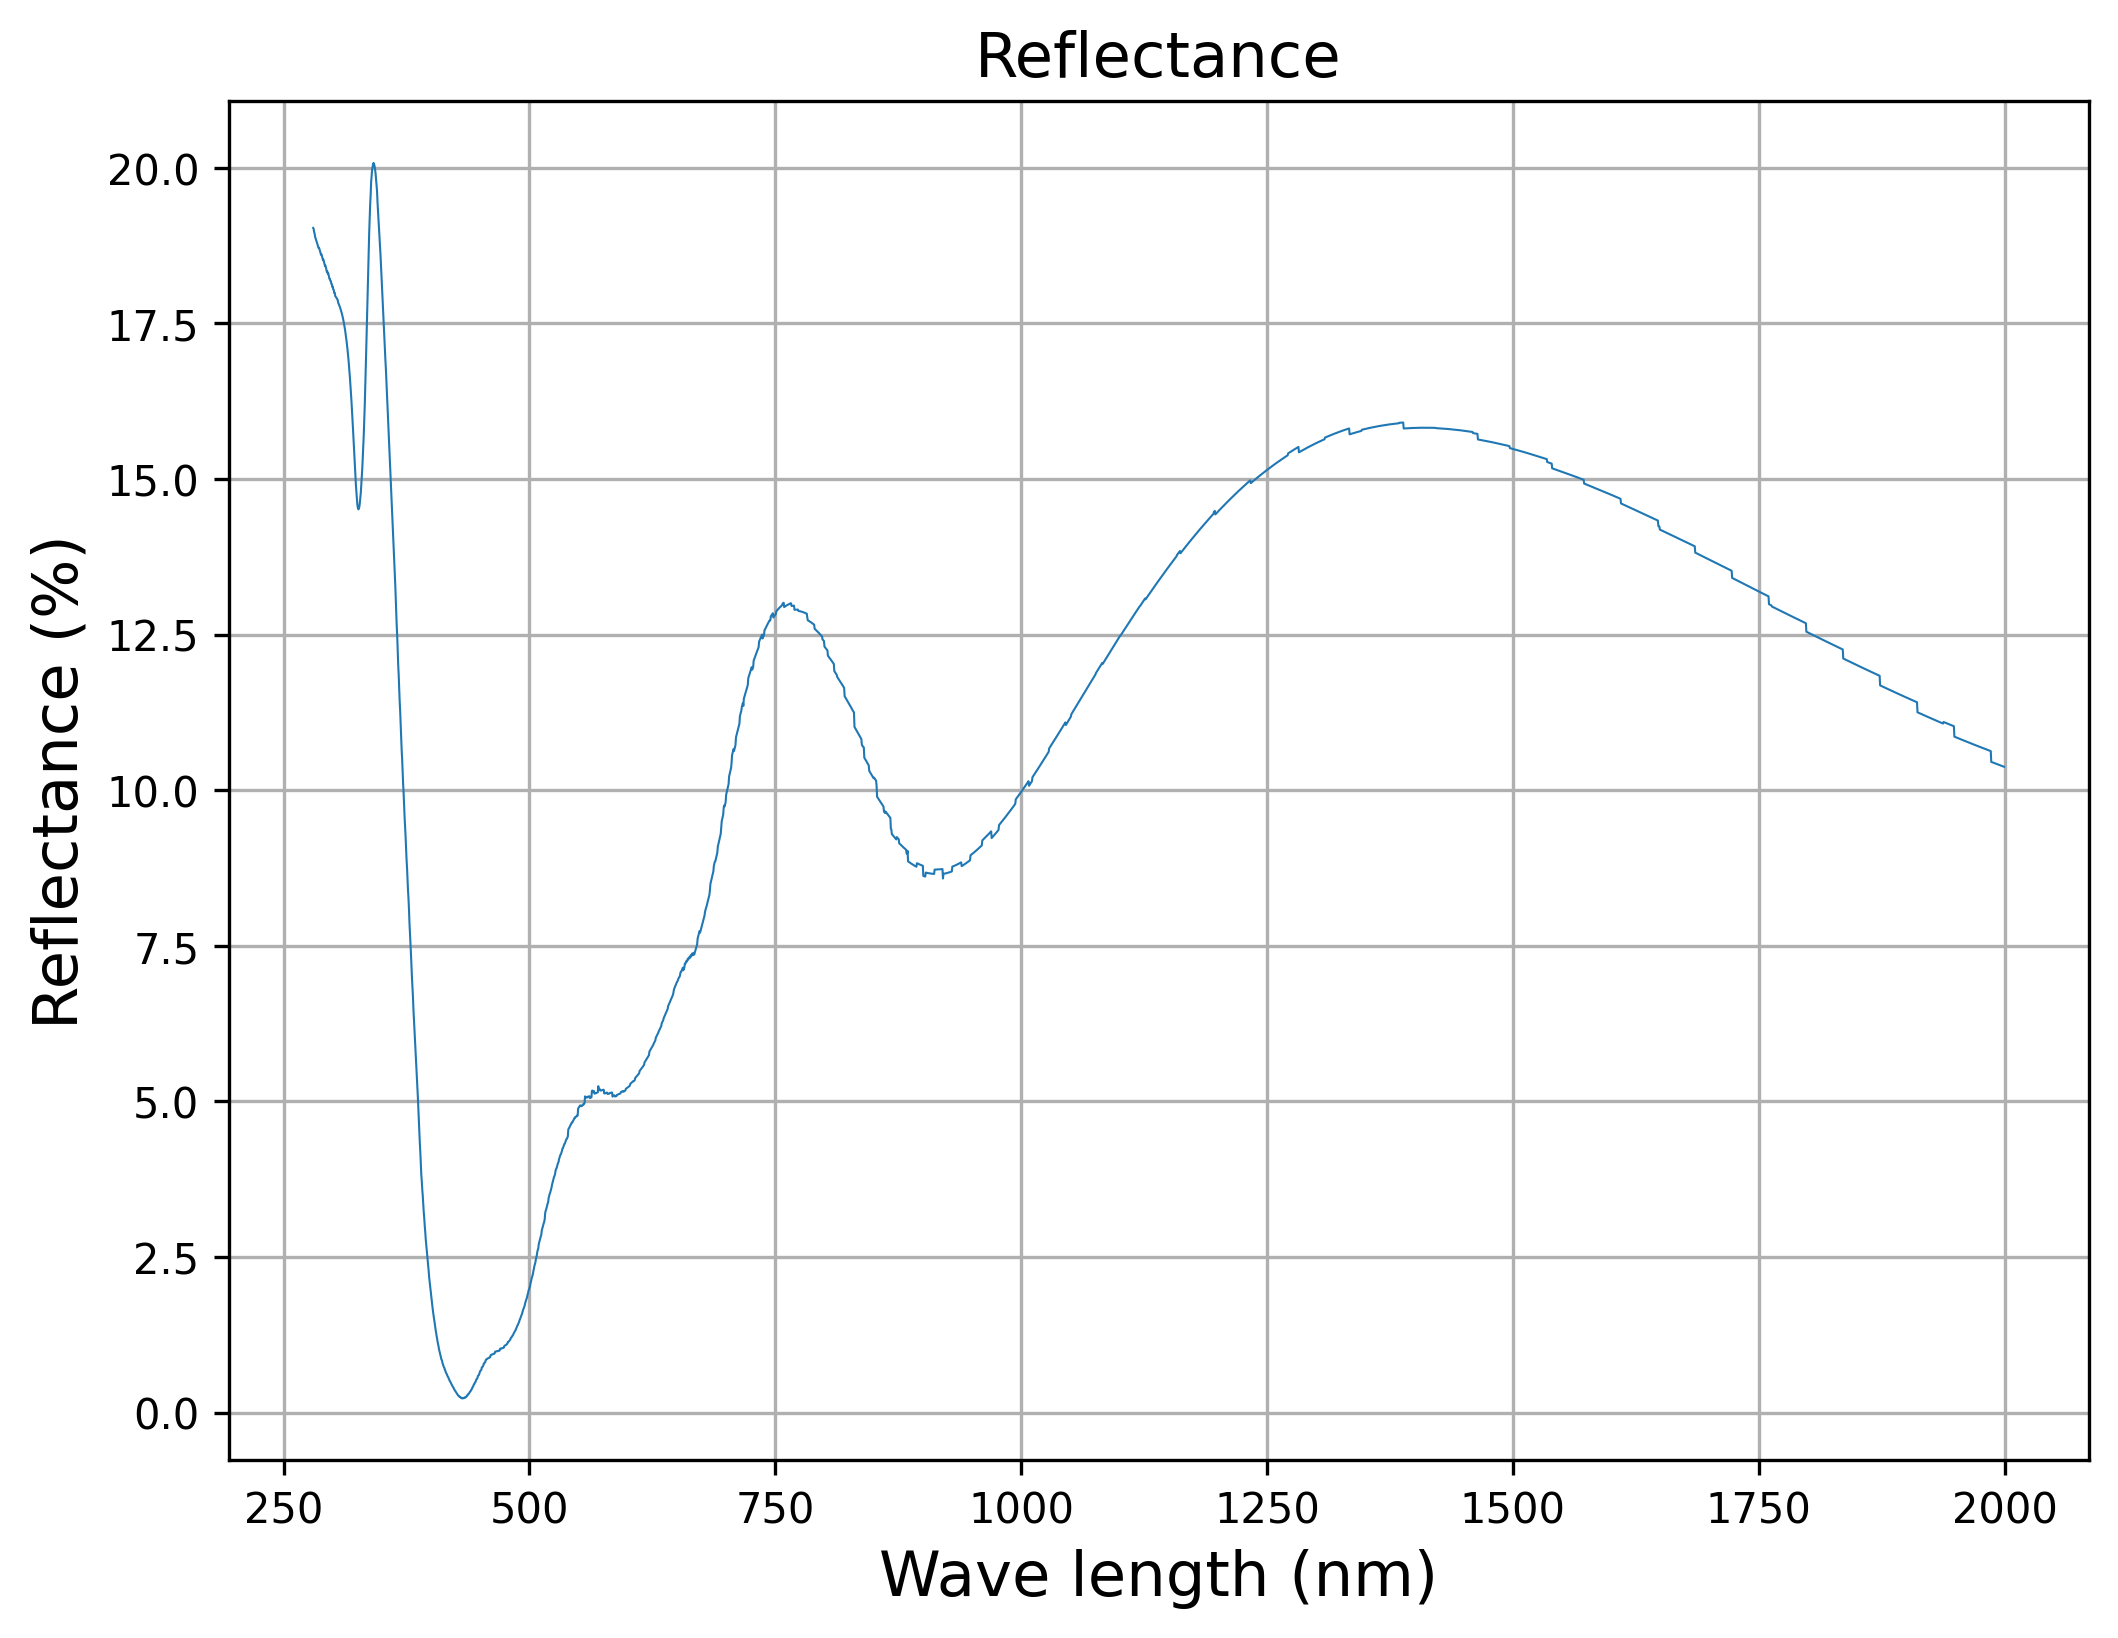

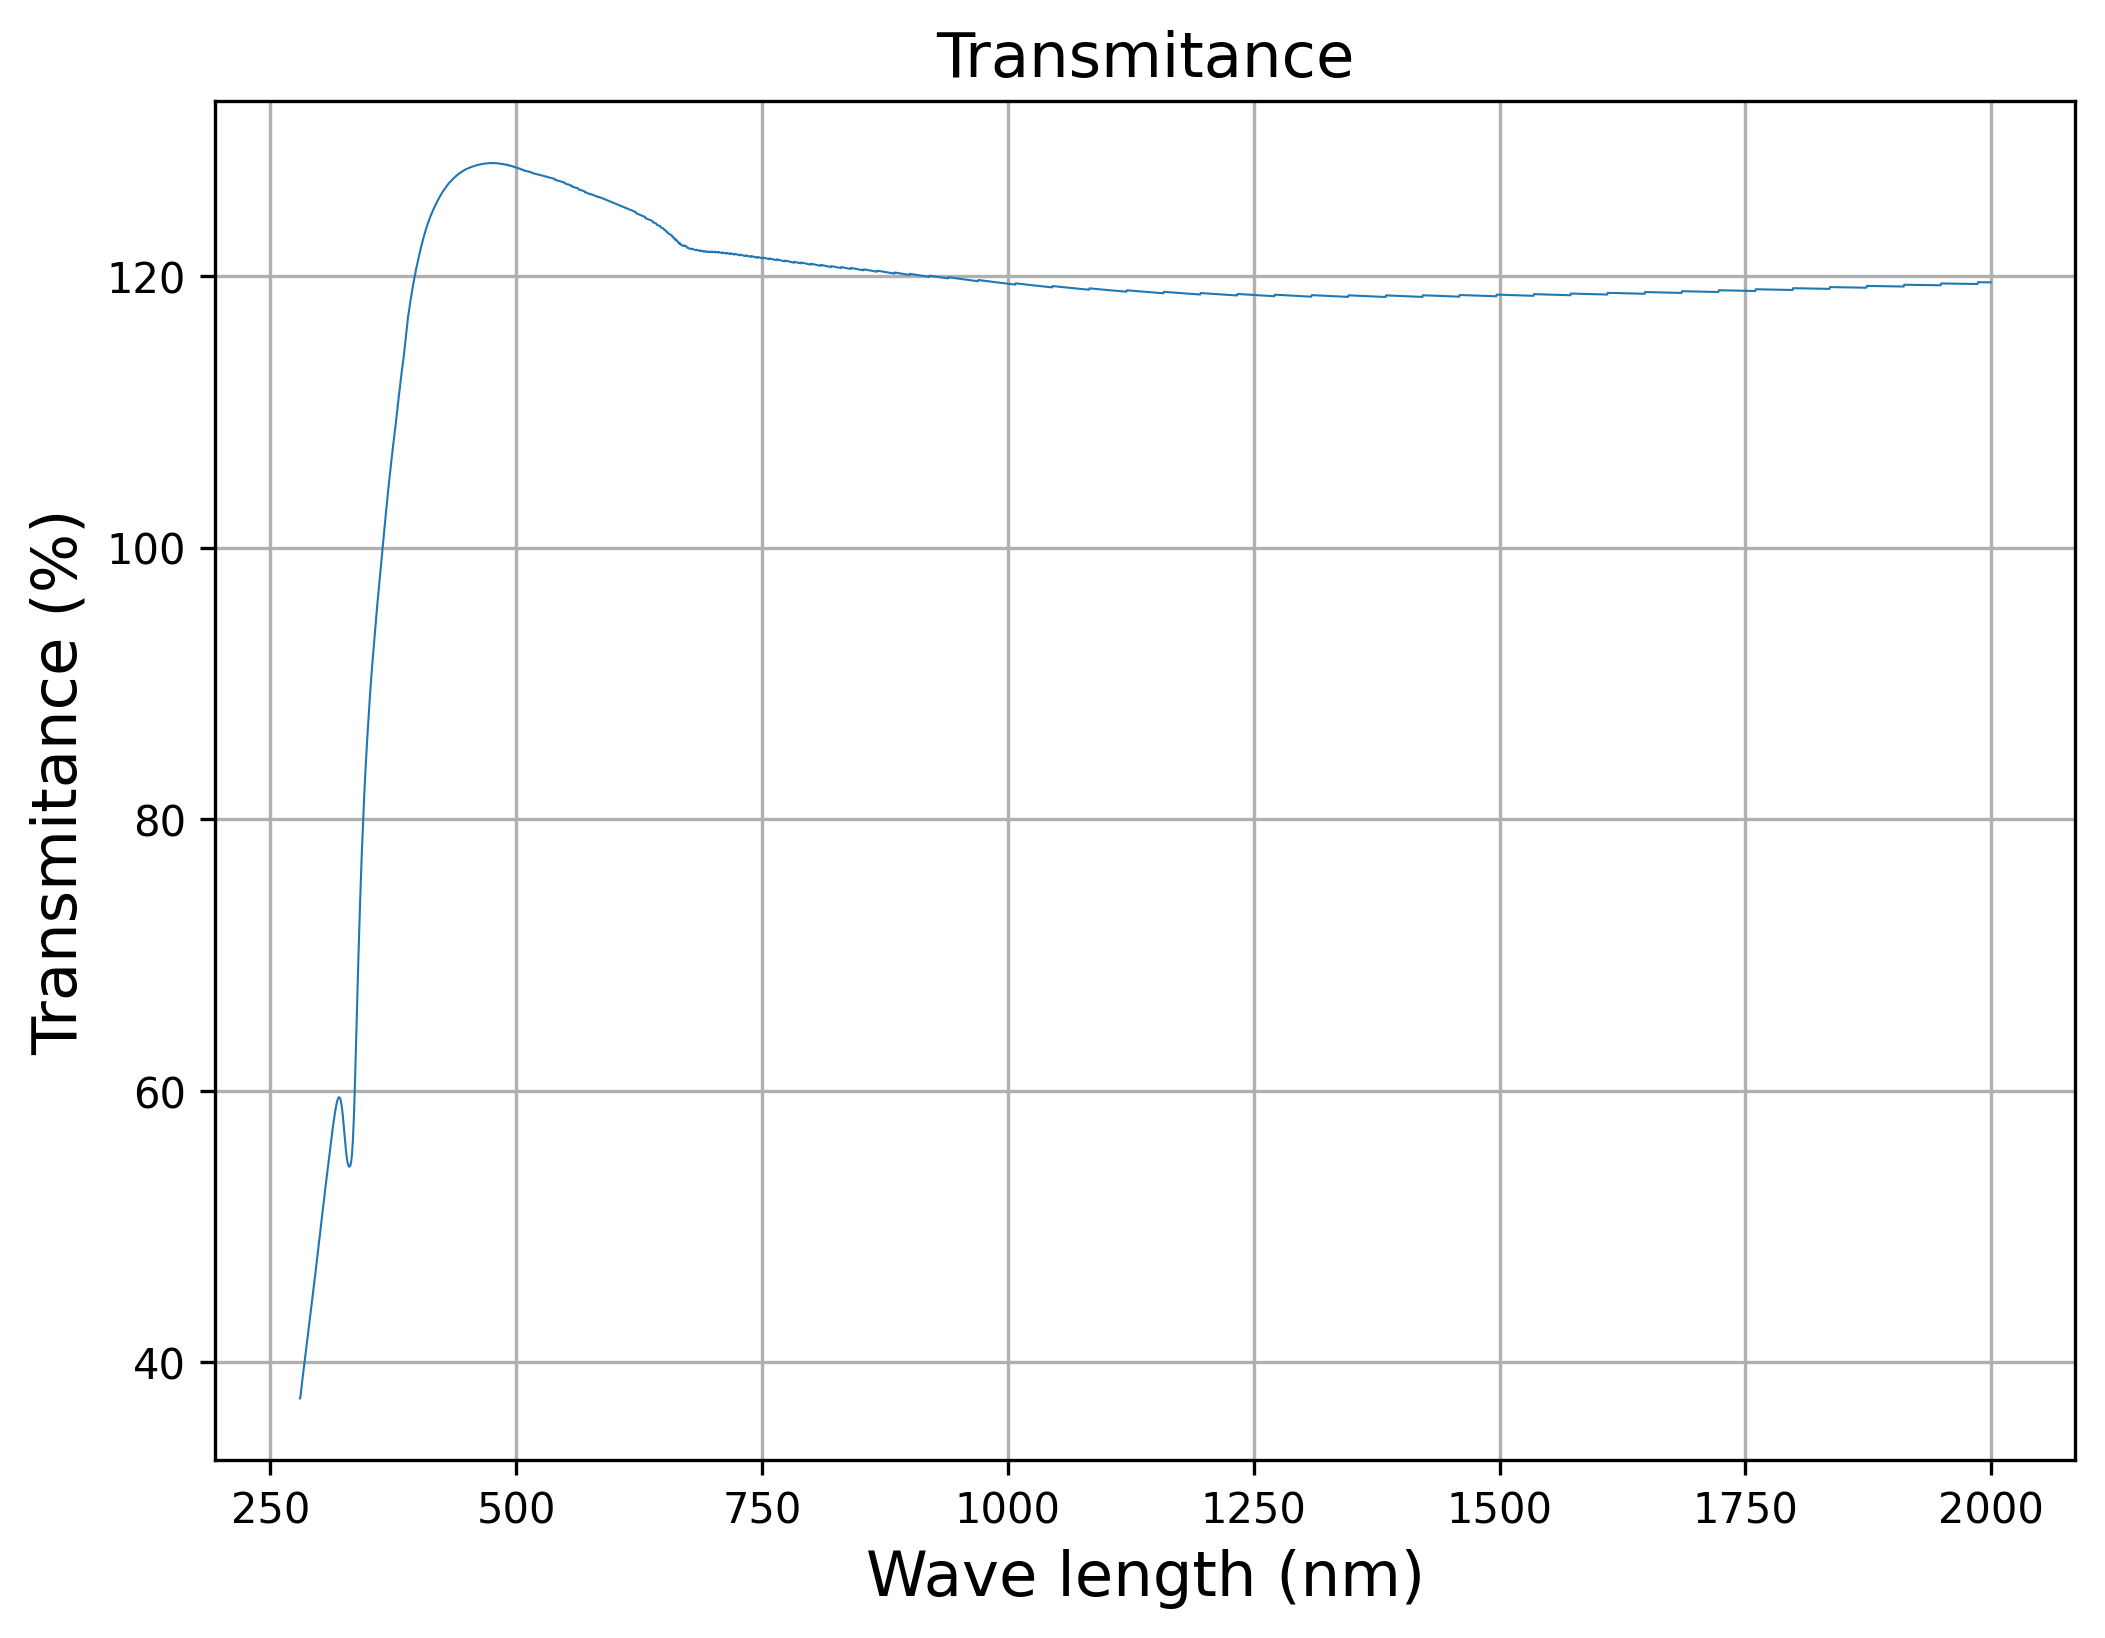

In [6]:
plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa_GaAs.lambd, cell2.R, linewidth=0.5)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Reflectance (%)", {"fontsize": 15})
plt.title("Reflectance", {"fontsize": 15})
plt.grid(True)

plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa_GaAs.lambd, cell2.T, linewidth=0.5)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Transmitance (%)", {"fontsize": 15})
plt.title("Transmitance", {"fontsize": 15})
plt.grid(True)

In [11]:
top, up, layer = cell2.layers[0:3]
l = (
    (1 + top.g) * (1 + up.g) * (1 + layer.g)
    - up.h * layer.h * (1 + top.g)
    - layer.h * top.h * (1 + up.g)
    - top.h * up.h * (1 + layer.g)
)
m = (
    top.h * (1 + up.g) * (1 + layer.g)
    + up.h * (1 + layer.g) * (1 + top.g)
    + layer.h * (1 + top.g) * (1 + up.g)
    - top.h * up.h * layer.h
)
T = (layer.n / 1) * ((l ** 2) + (m ** 2)) / (
    (cell2.p_T ** 2) + (cell2.q_T ** 2)) * 100
print(cell2.T, T)

[ 37.35115405  37.41799788  37.75784227 ... 119.53008137 119.52876468
 119.52827712] [ 37.35115405  37.41799788  37.75784227 ... 119.53008137 119.52876468
 119.52827712]


In [14]:
print(top.name, up.name, layer.name)

MgF2 ZnS InGaP


In [ ]:
l13 = (
    (1 + g1) * (1 + g2) * (1 + g3)
    - h2 * h3 * (1 + g1)
    - h3 * h1 * (1 + g2)
    - h1 * h2 * (1 + g3)
)
m13 = (
    h1 * (1 + g2) * (1 + g3)
    + h2 * (1 + g3) * (1 + g1)
    + h3 * (1 + g1) * (1 + g2)
    - h1 * h2 * h3
)

T = (n3 / no) * ((l13 ** 2) + (m13 ** 2)) / (
    (p13 ** 2) + (q13 ** 2)) * 100

In [7]:
cell3= optik.lego_tower(capa_MgF,capa_ZnS,capa_InGaP)

Thickness of MgF2:97
Thickness of ZnS:41
Thickness of InGaP:200


In [8]:
cell3.RT()

(array([19.03316807, 19.0213741 , 18.96908578, ..., 12.45815241,
        12.45876008, 12.45918025]),
 array([ 37.35115405,  37.41799788,  37.75784227, ..., 119.53008137,
        119.52876468, 119.52827712]))

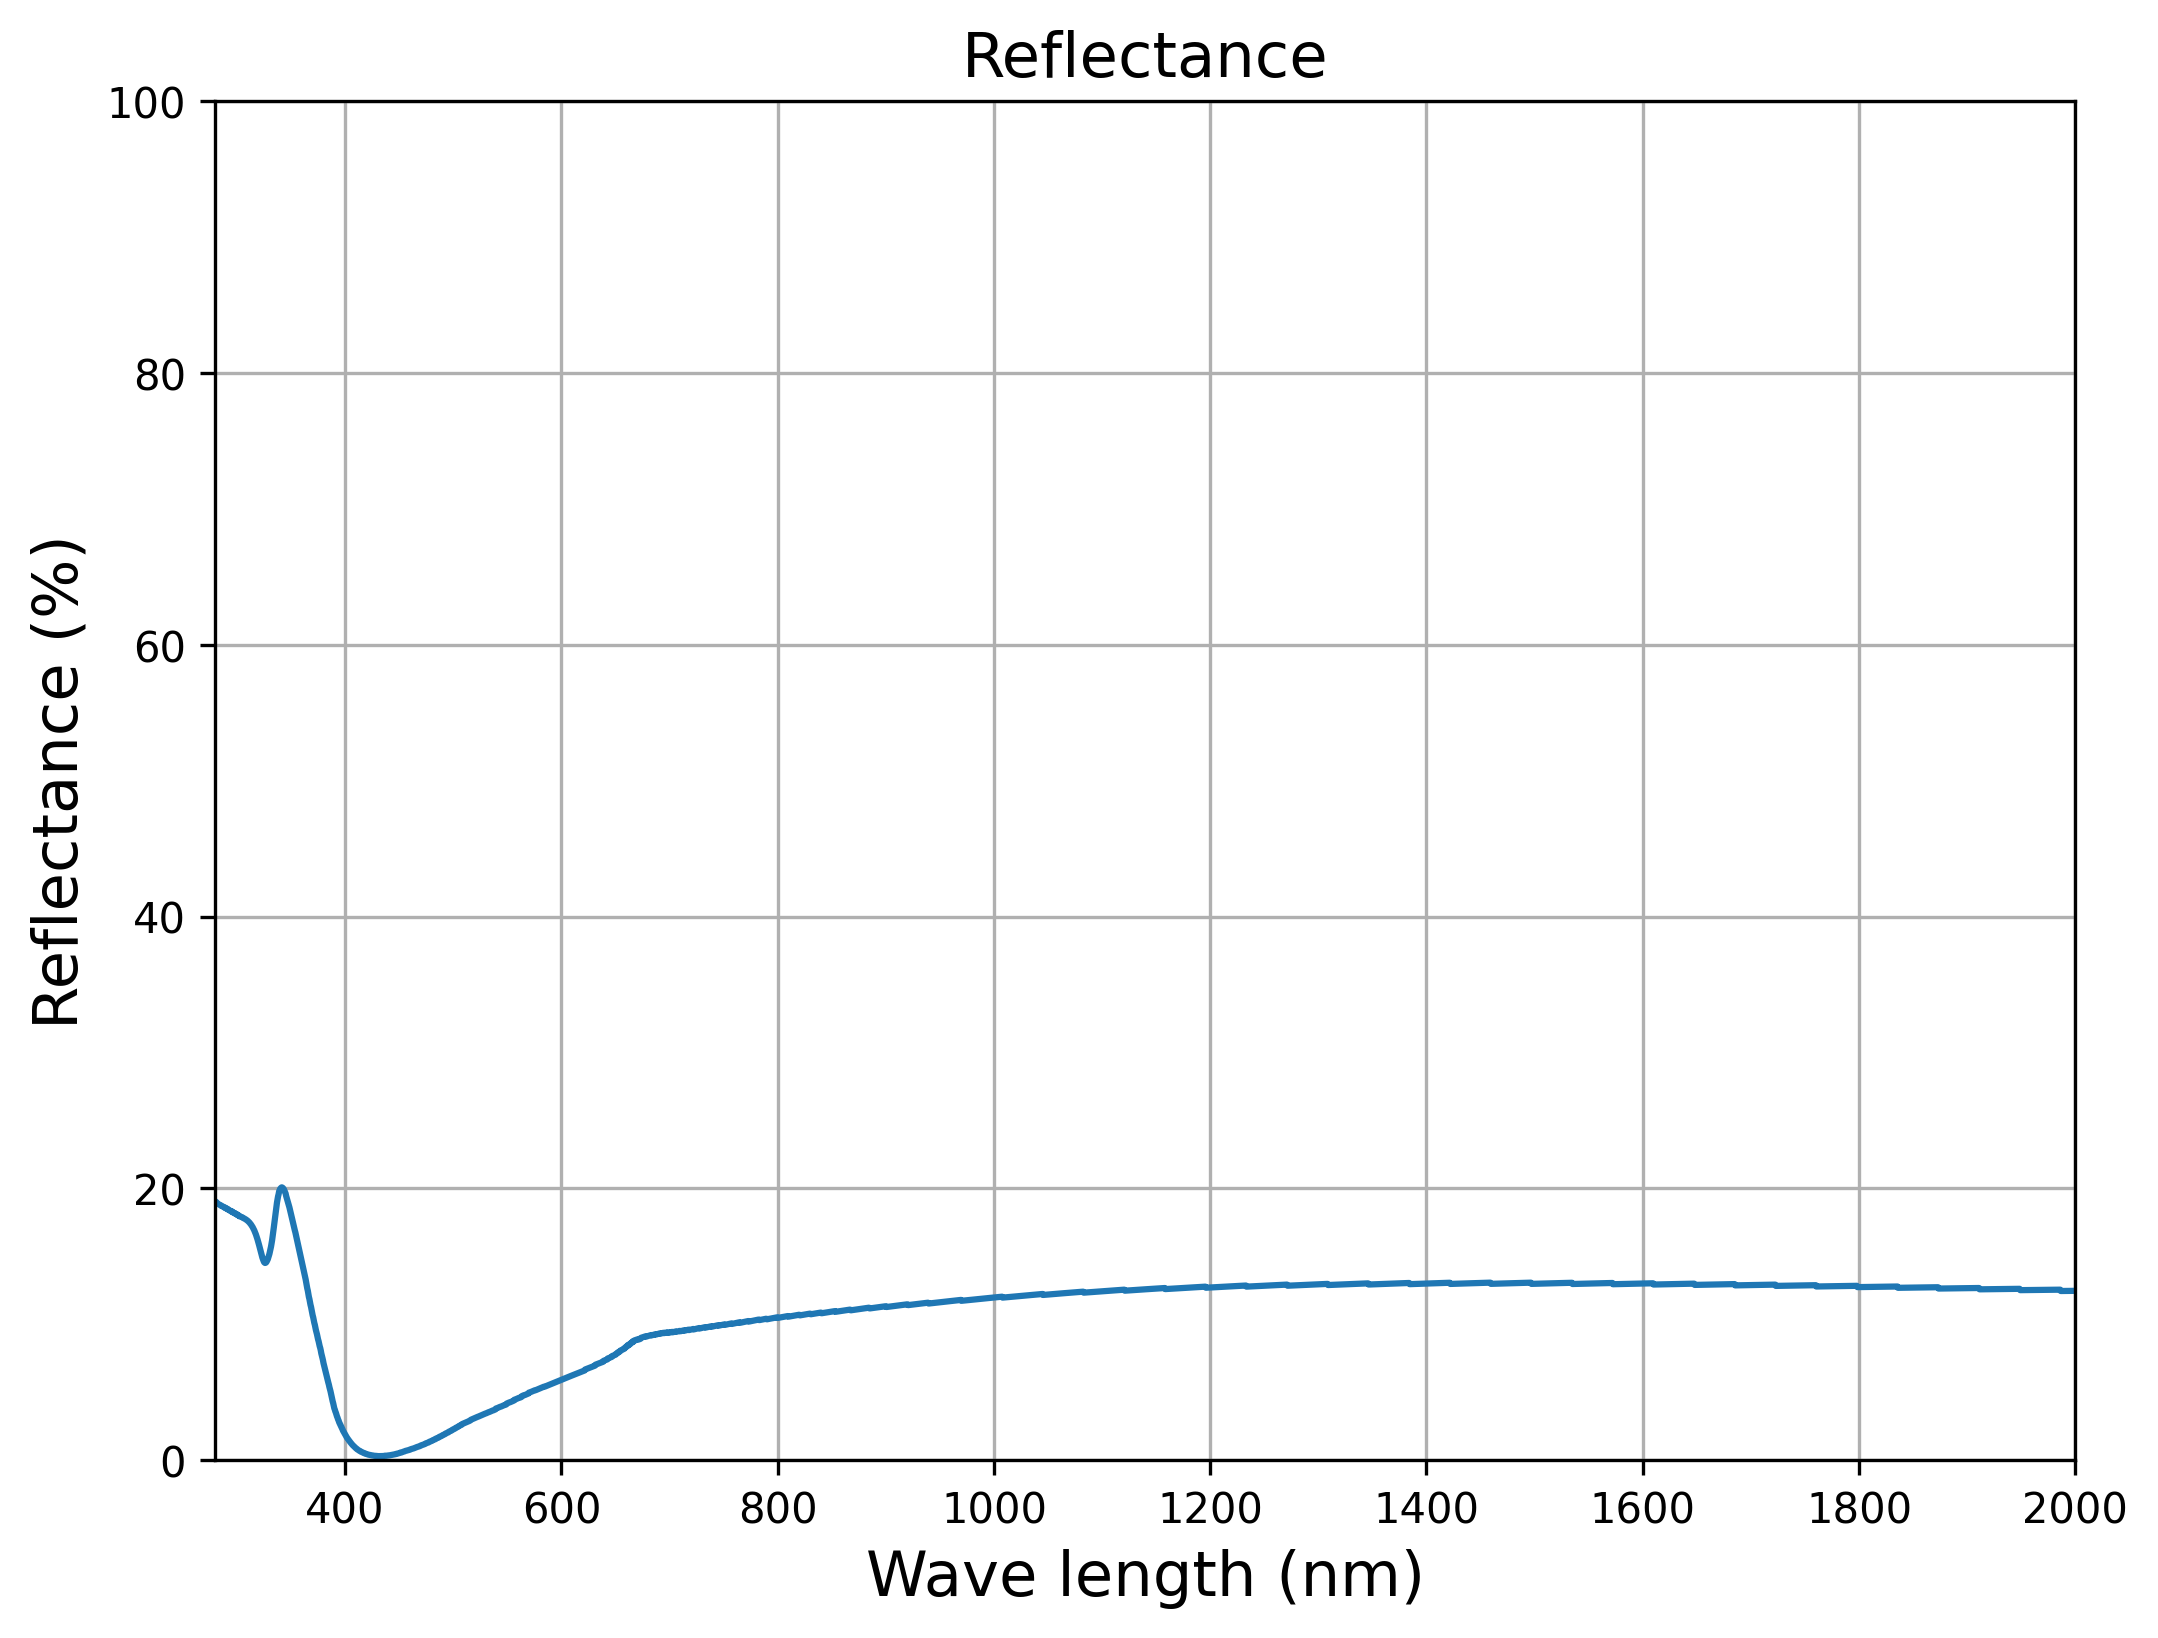

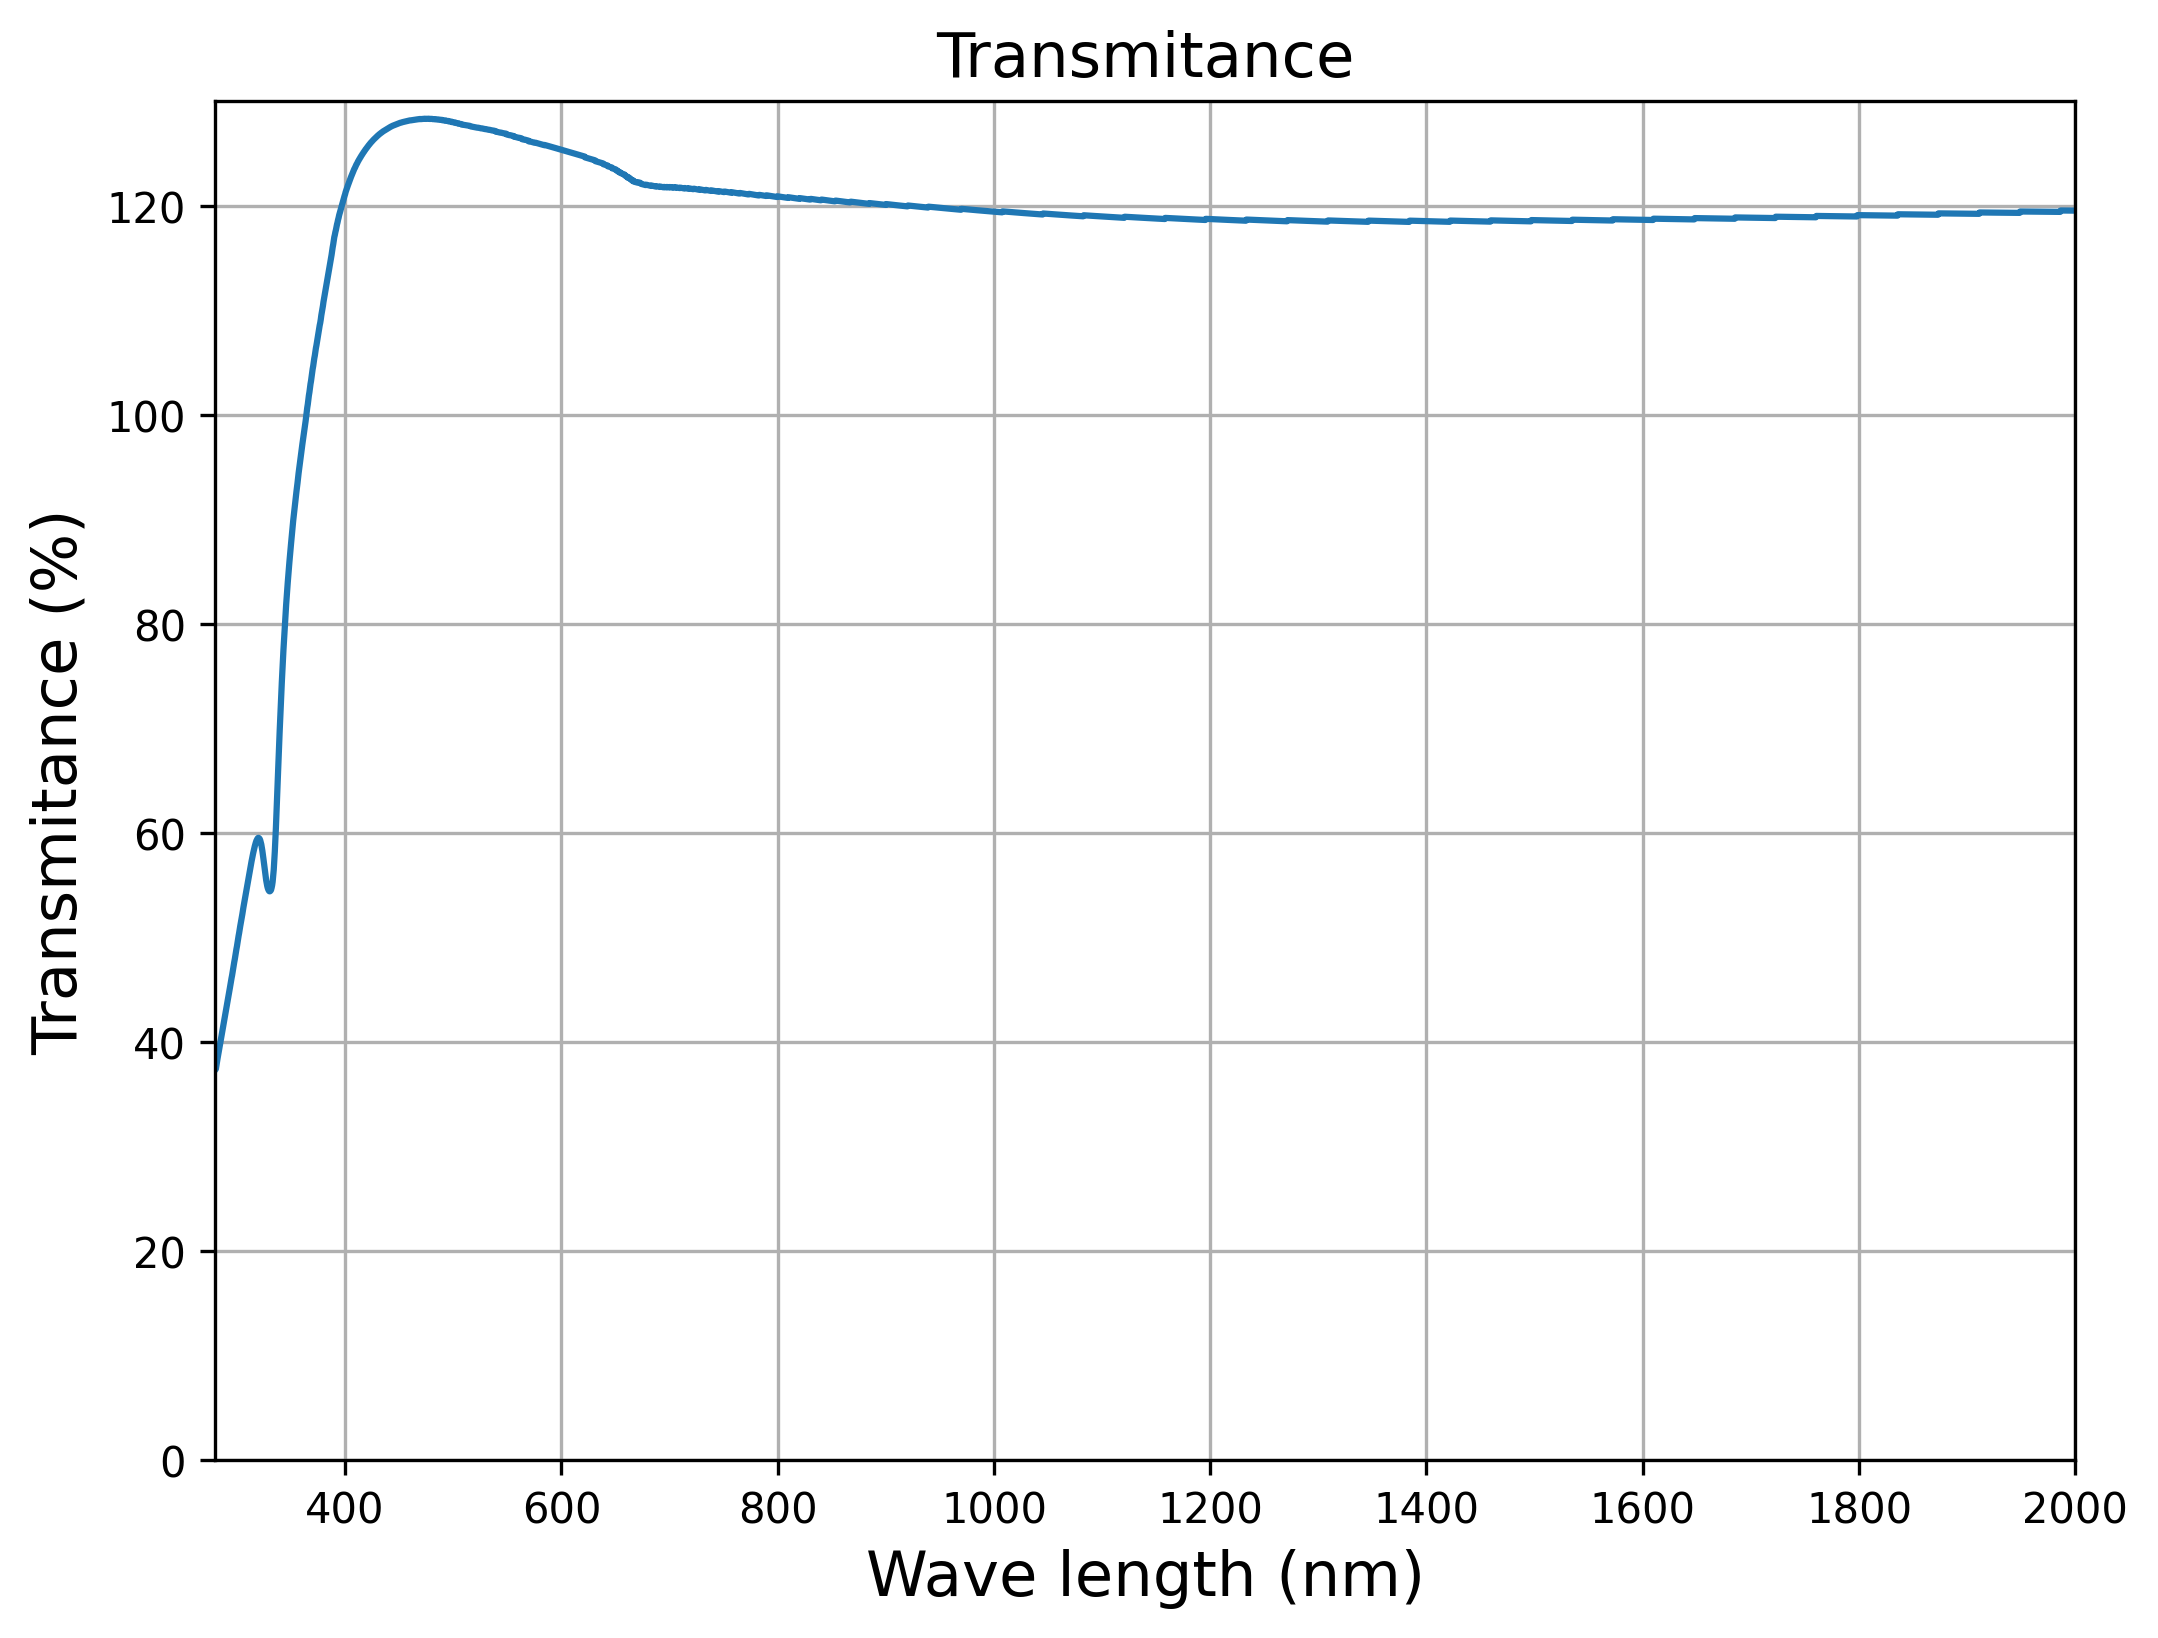

In [19]:
plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa_GaAs.lambd, cell3.R)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Reflectance (%)", {"fontsize": 15})
plt.title("Reflectance", {"fontsize": 15})
plt.axis([280, 2000, 0, 100])
plt.grid(True)

plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(capa_GaAs.lambd, cell3.T)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Transmitance (%)", {"fontsize": 15})
plt.title("Transmitance", {"fontsize": 15})
plt.axis([280, 2000, 0, 130])
plt.grid(True)

(280.0, 2000.0, 0.0, 100.0)

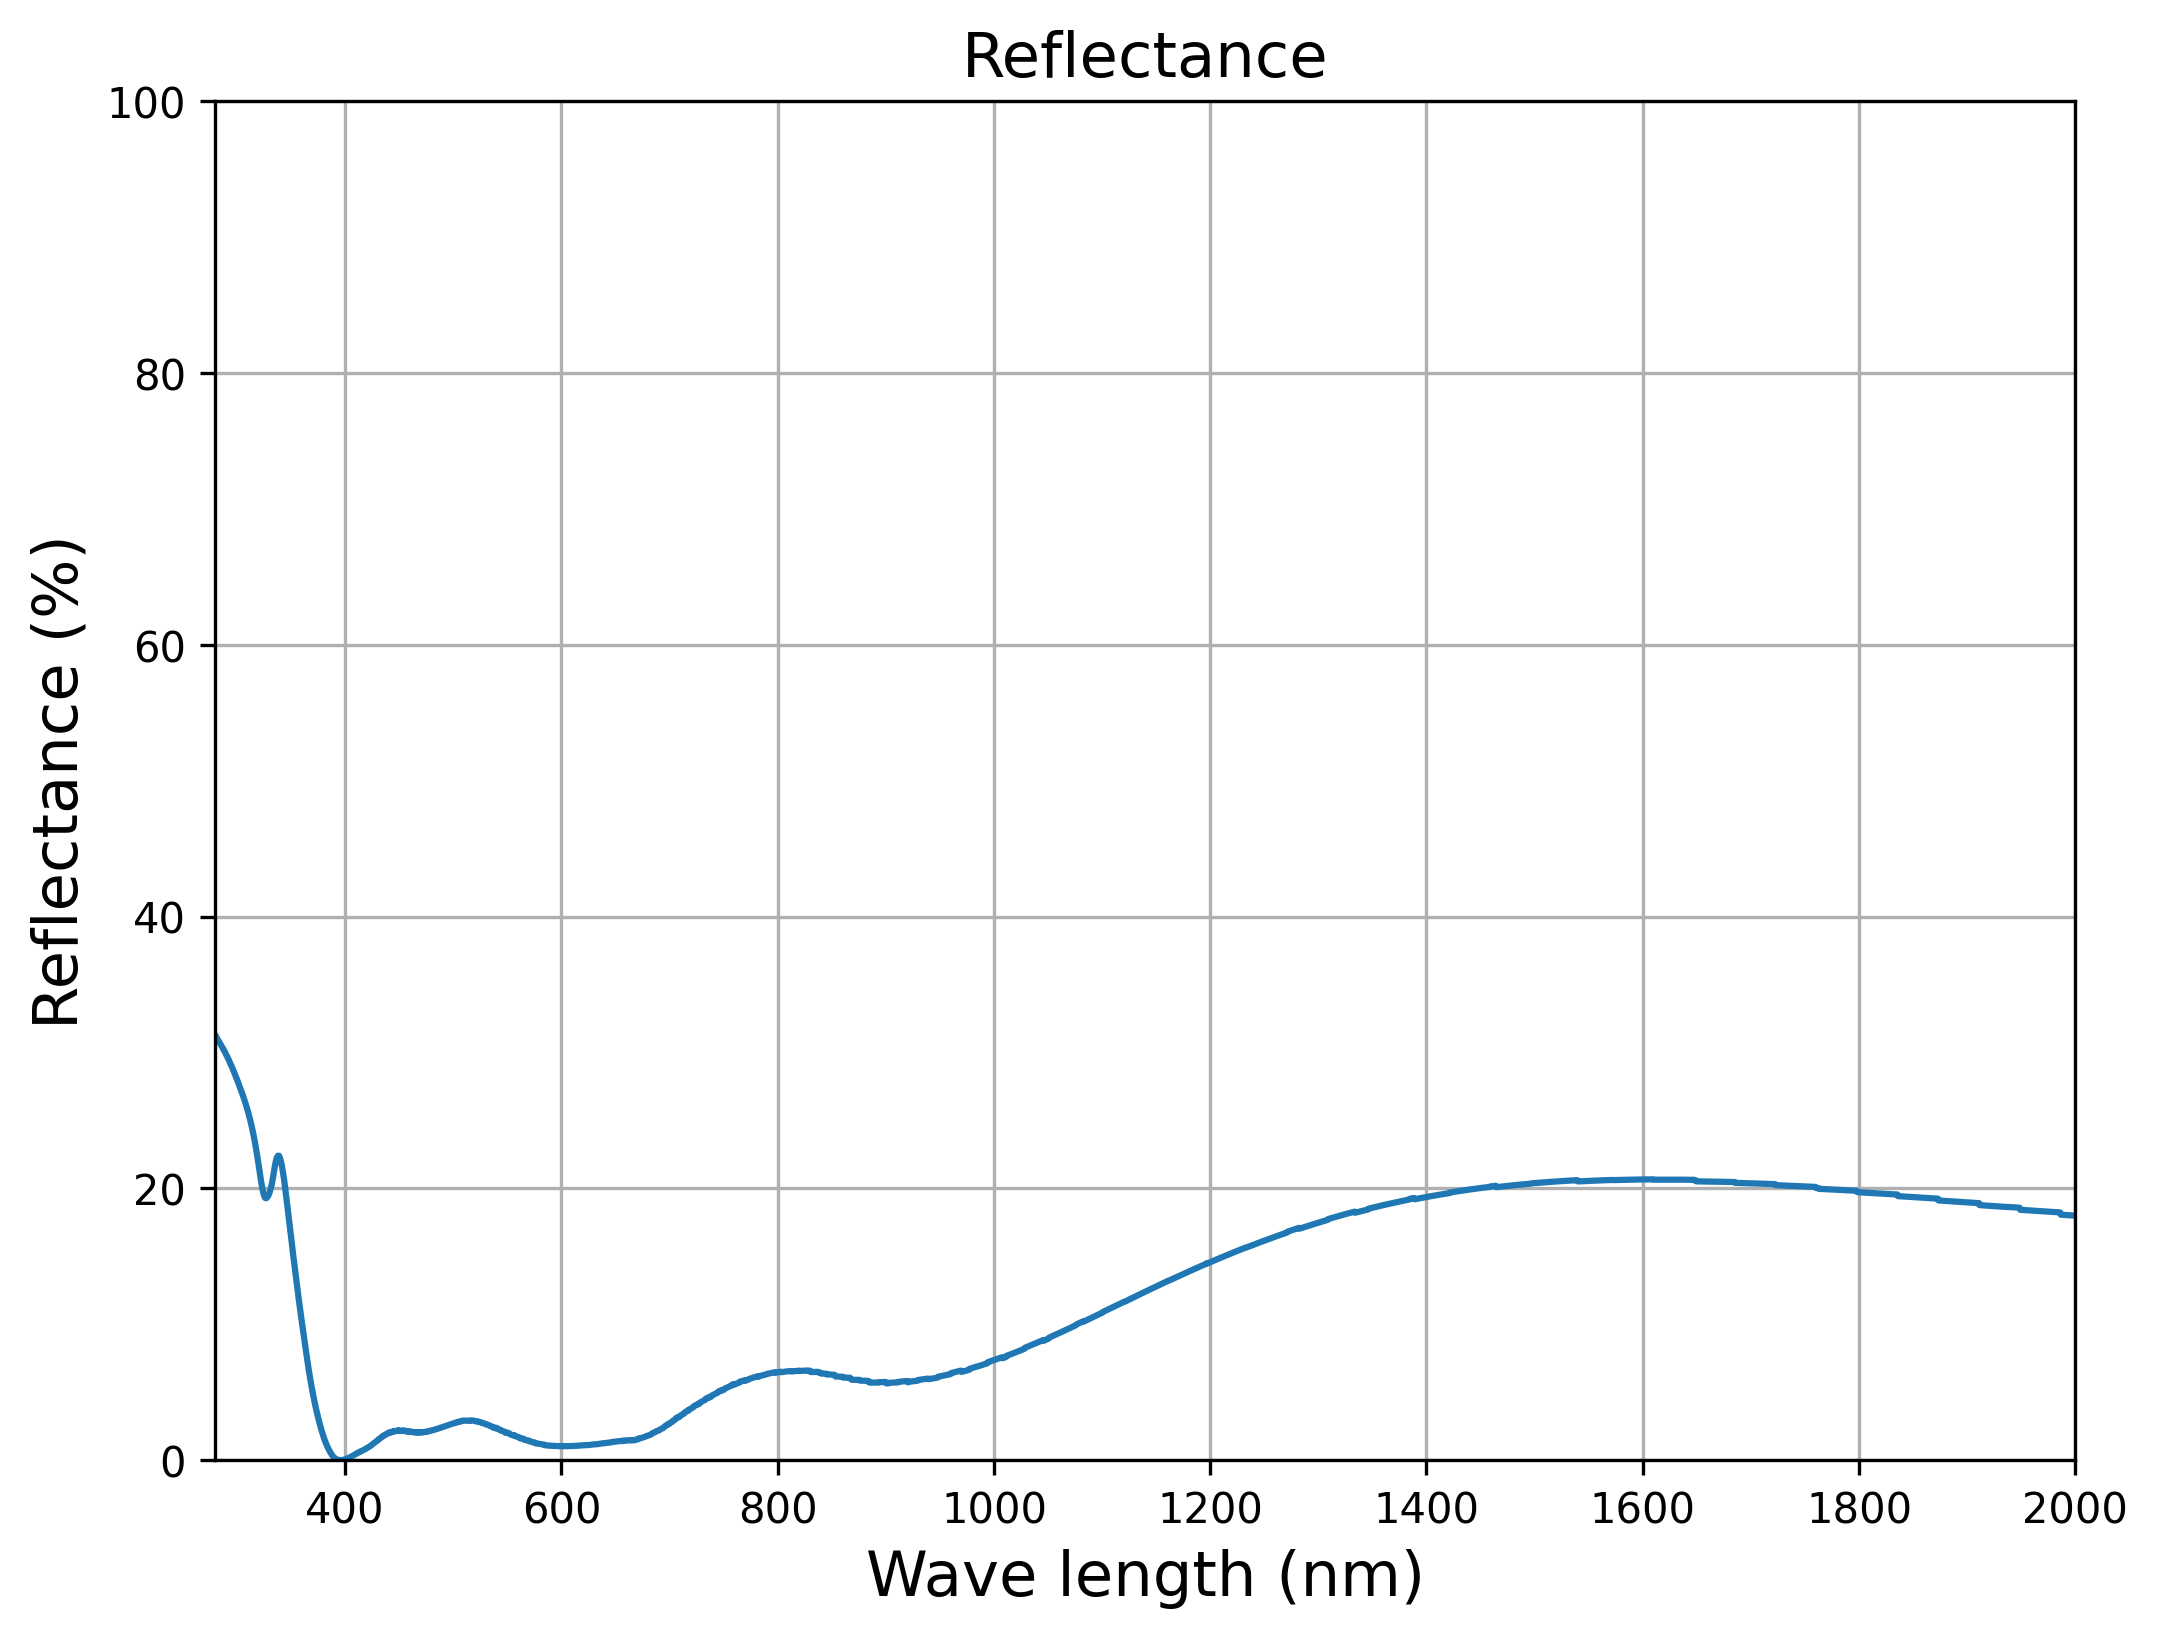

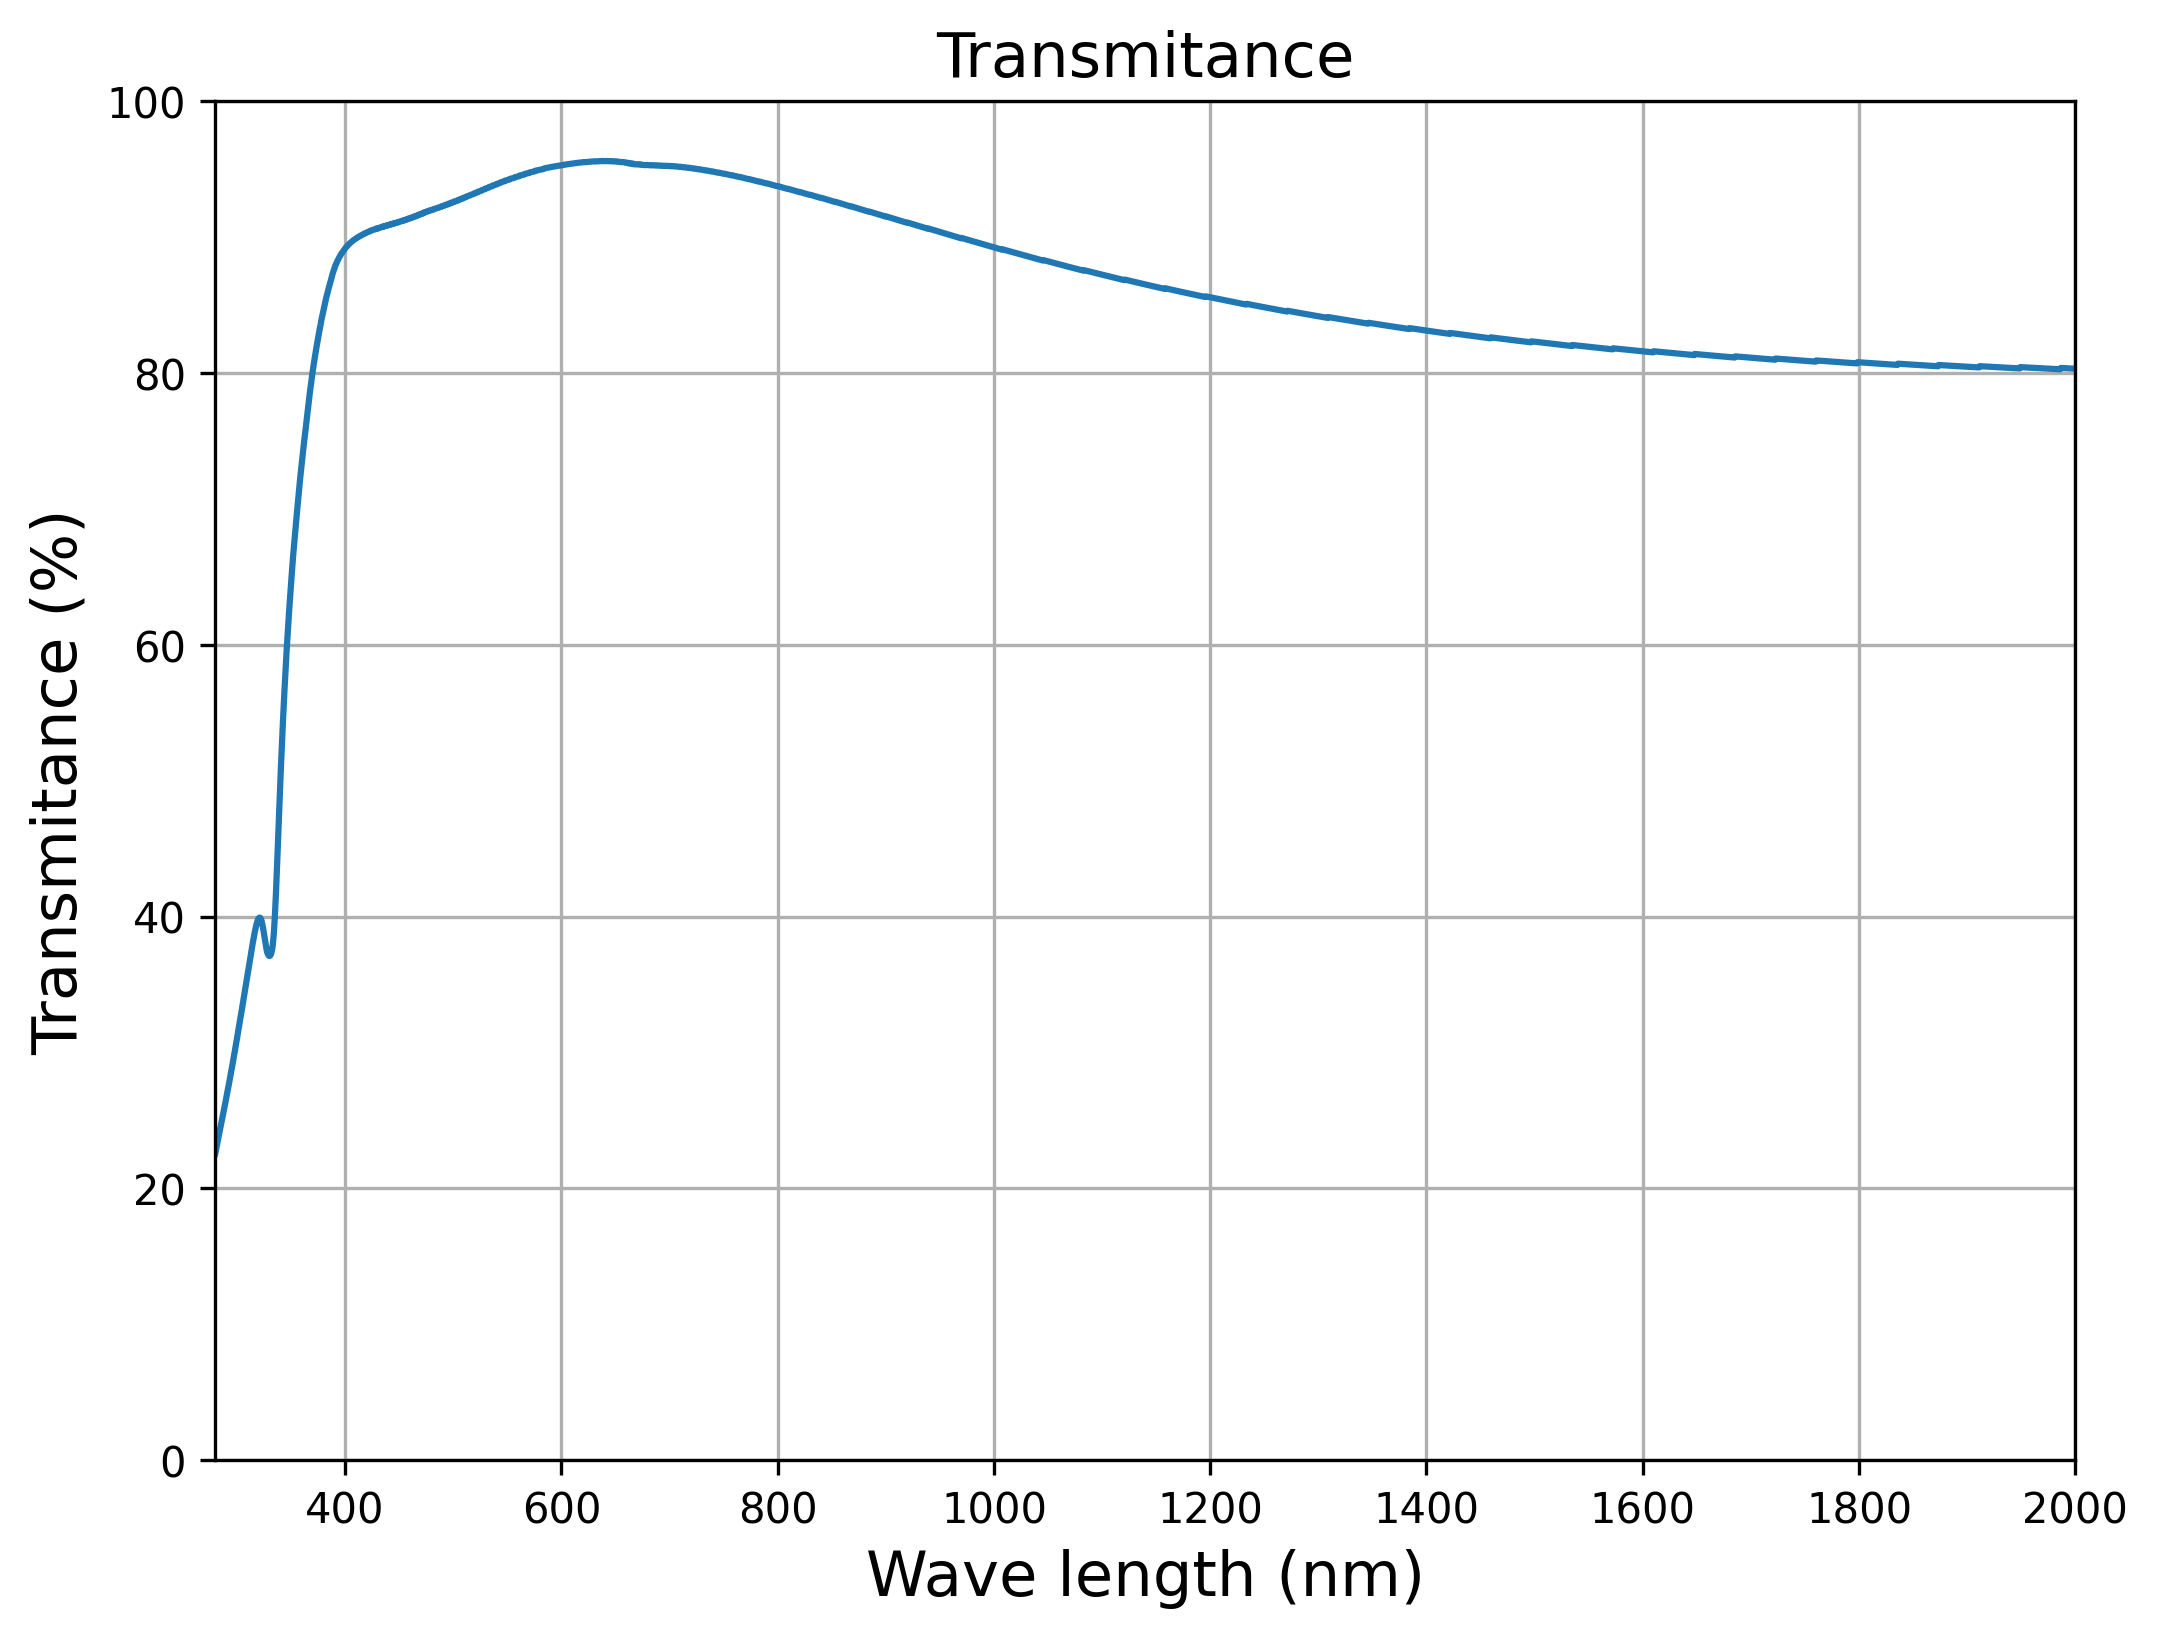

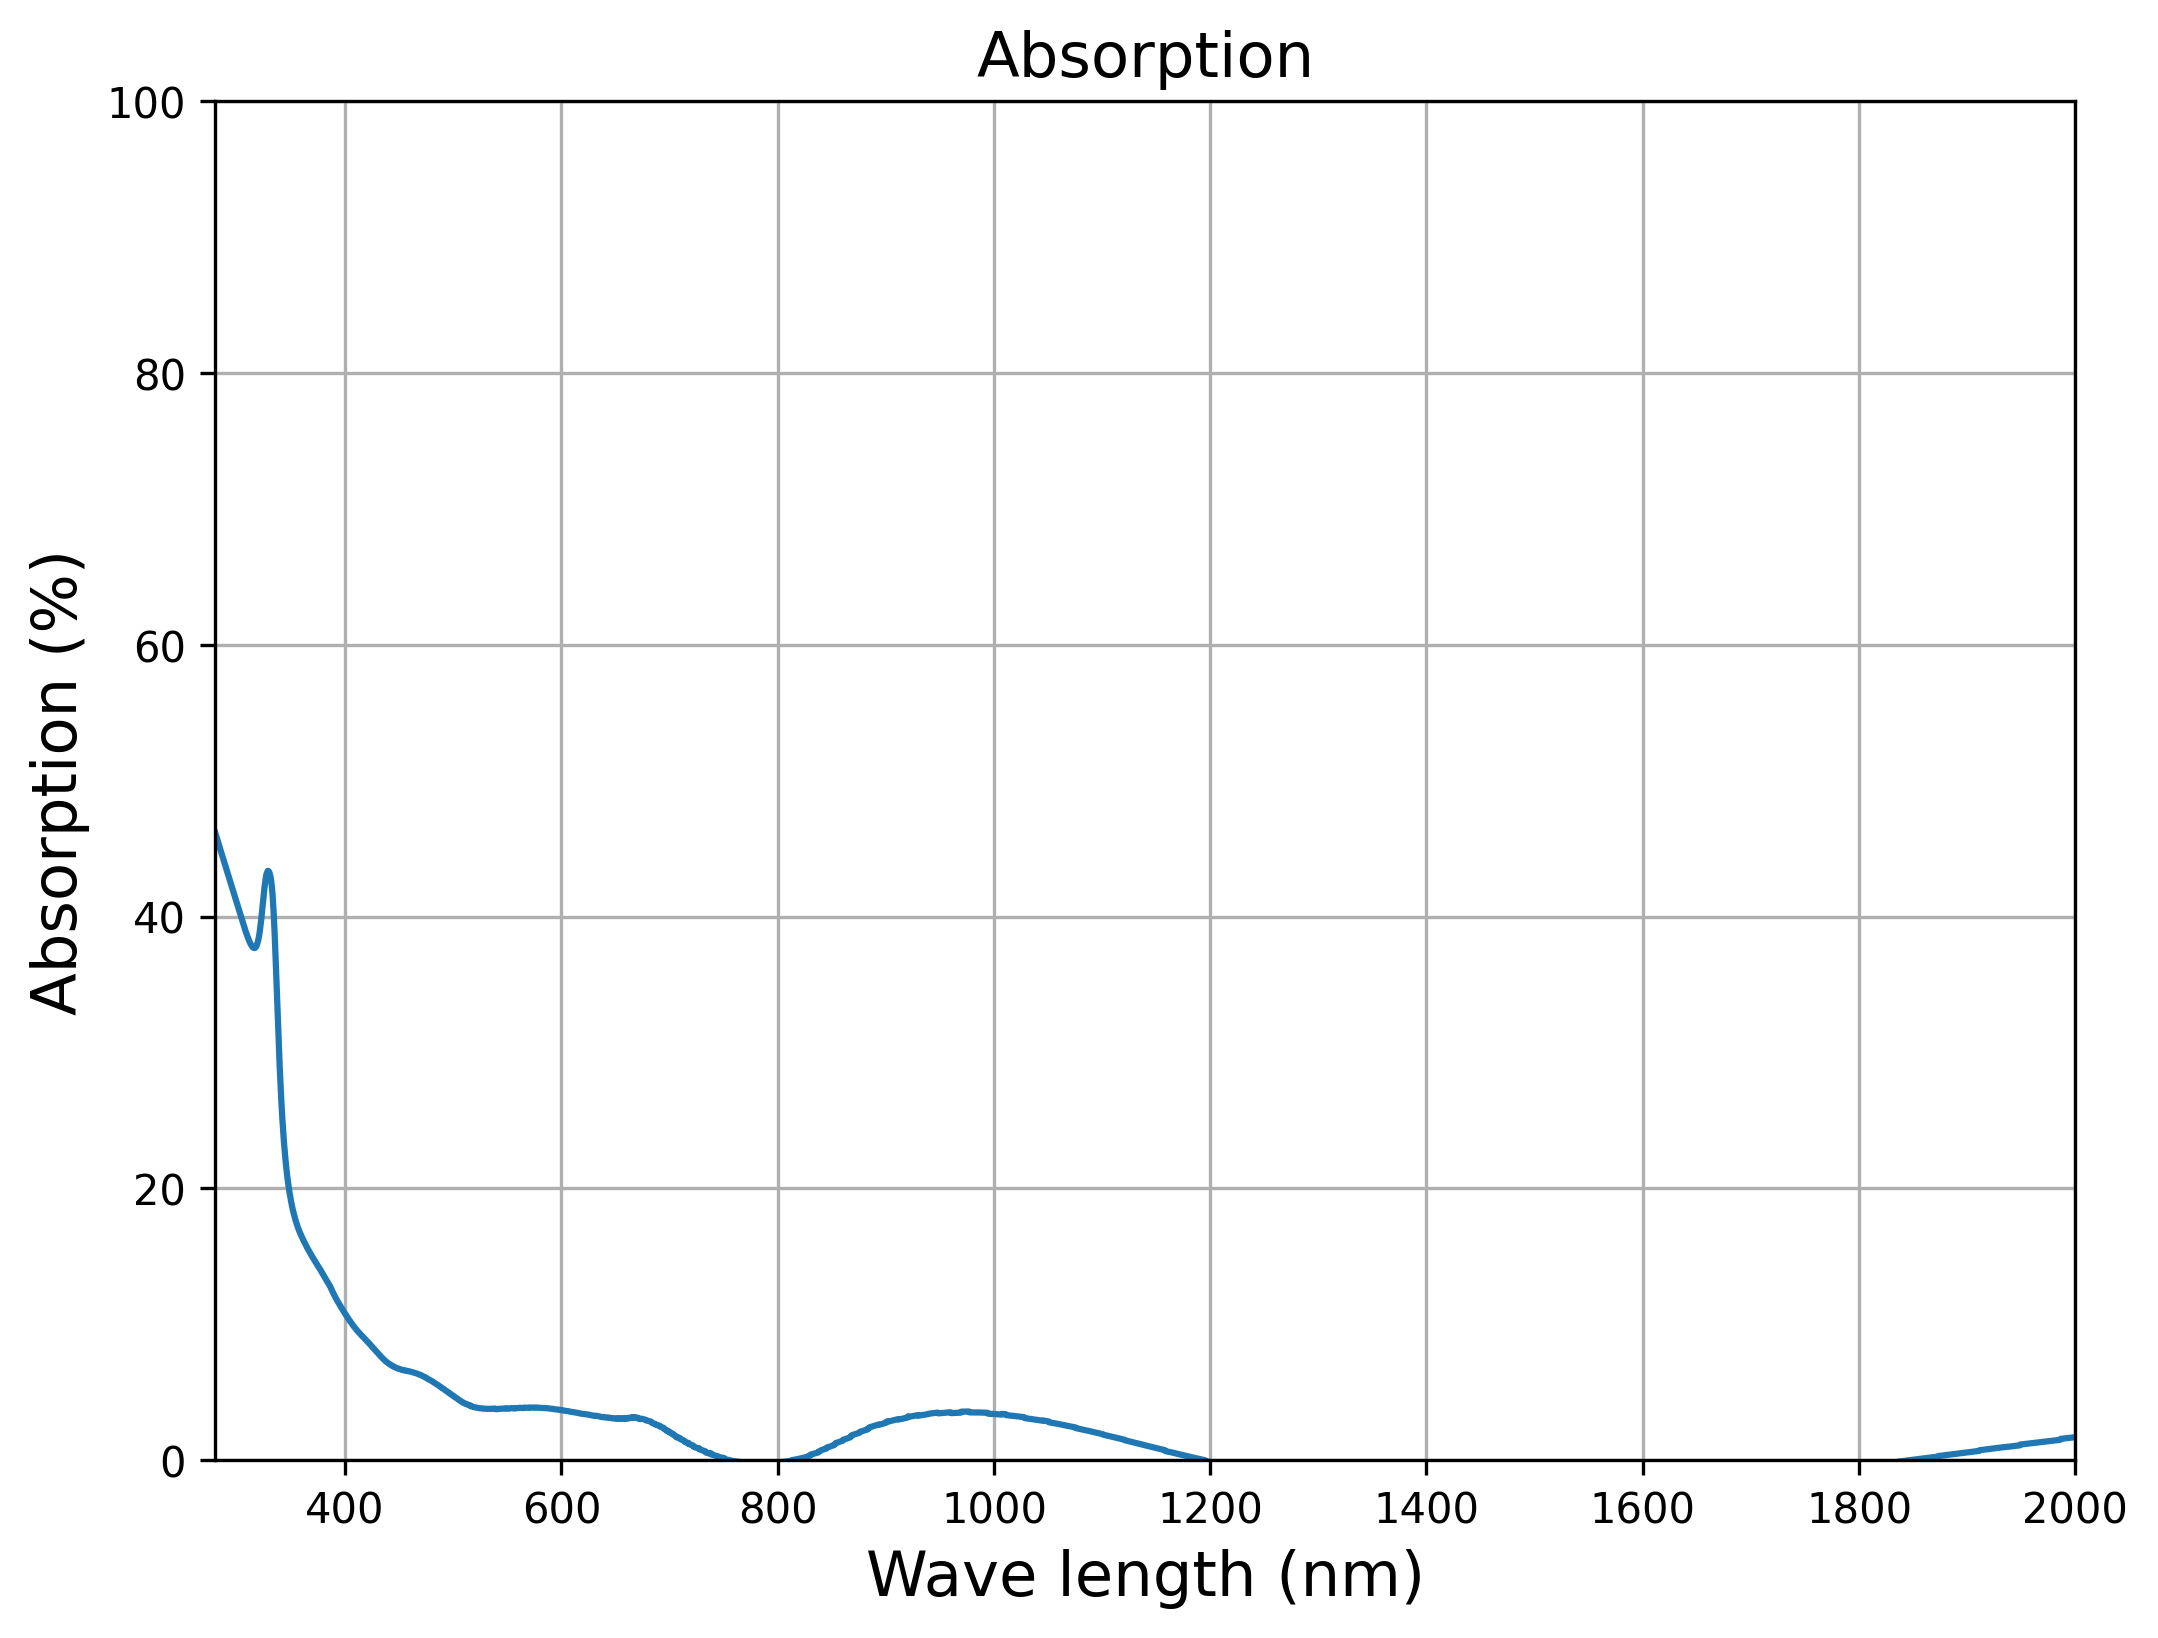

In [20]:
print(cell3.p,cell3.p_T)

[1.37590811 1.36542967 1.35033617 ... 0.79599876 0.79611859 0.79623676] [-1.40607332 -1.40118937 -1.39205006 ...  0.96067401  0.96069414
  0.9607155 ]


In [24]:
for i in cell3.layers:
    print(i.name, i.thickness)

MgF2 97.0
ZnS 41.0
InGaP 200.0


(280.0, 2000.0, 0.0, 100.0)

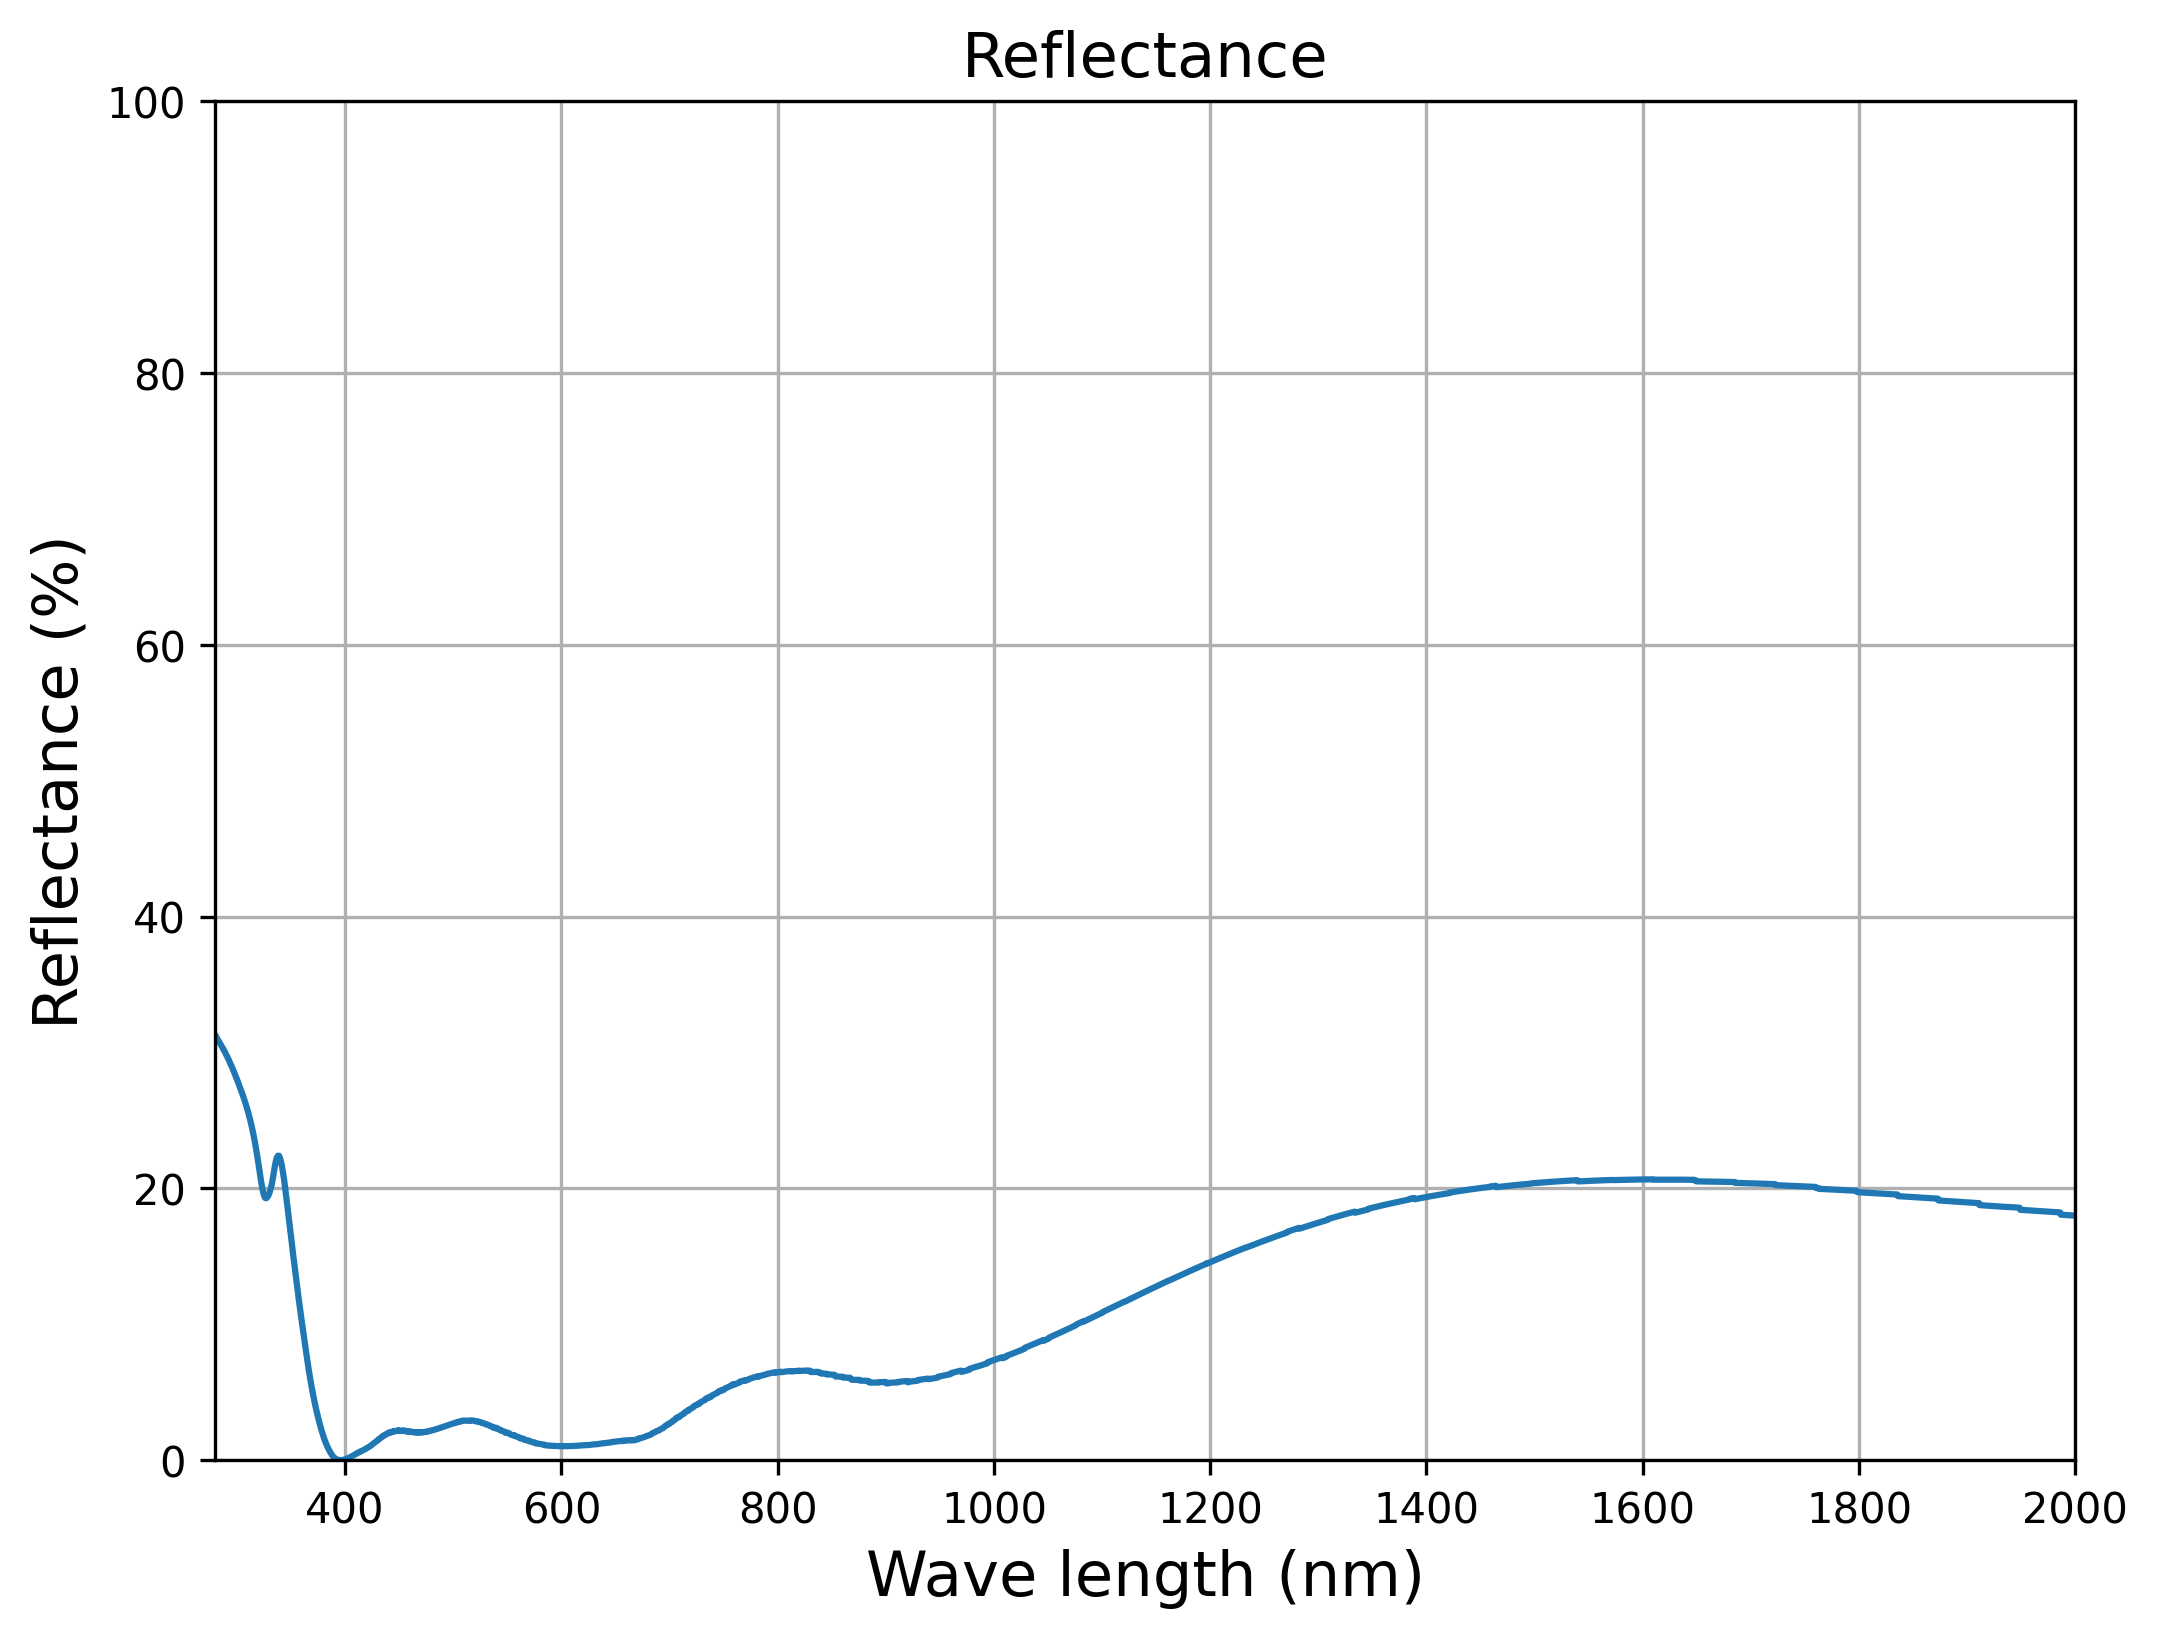

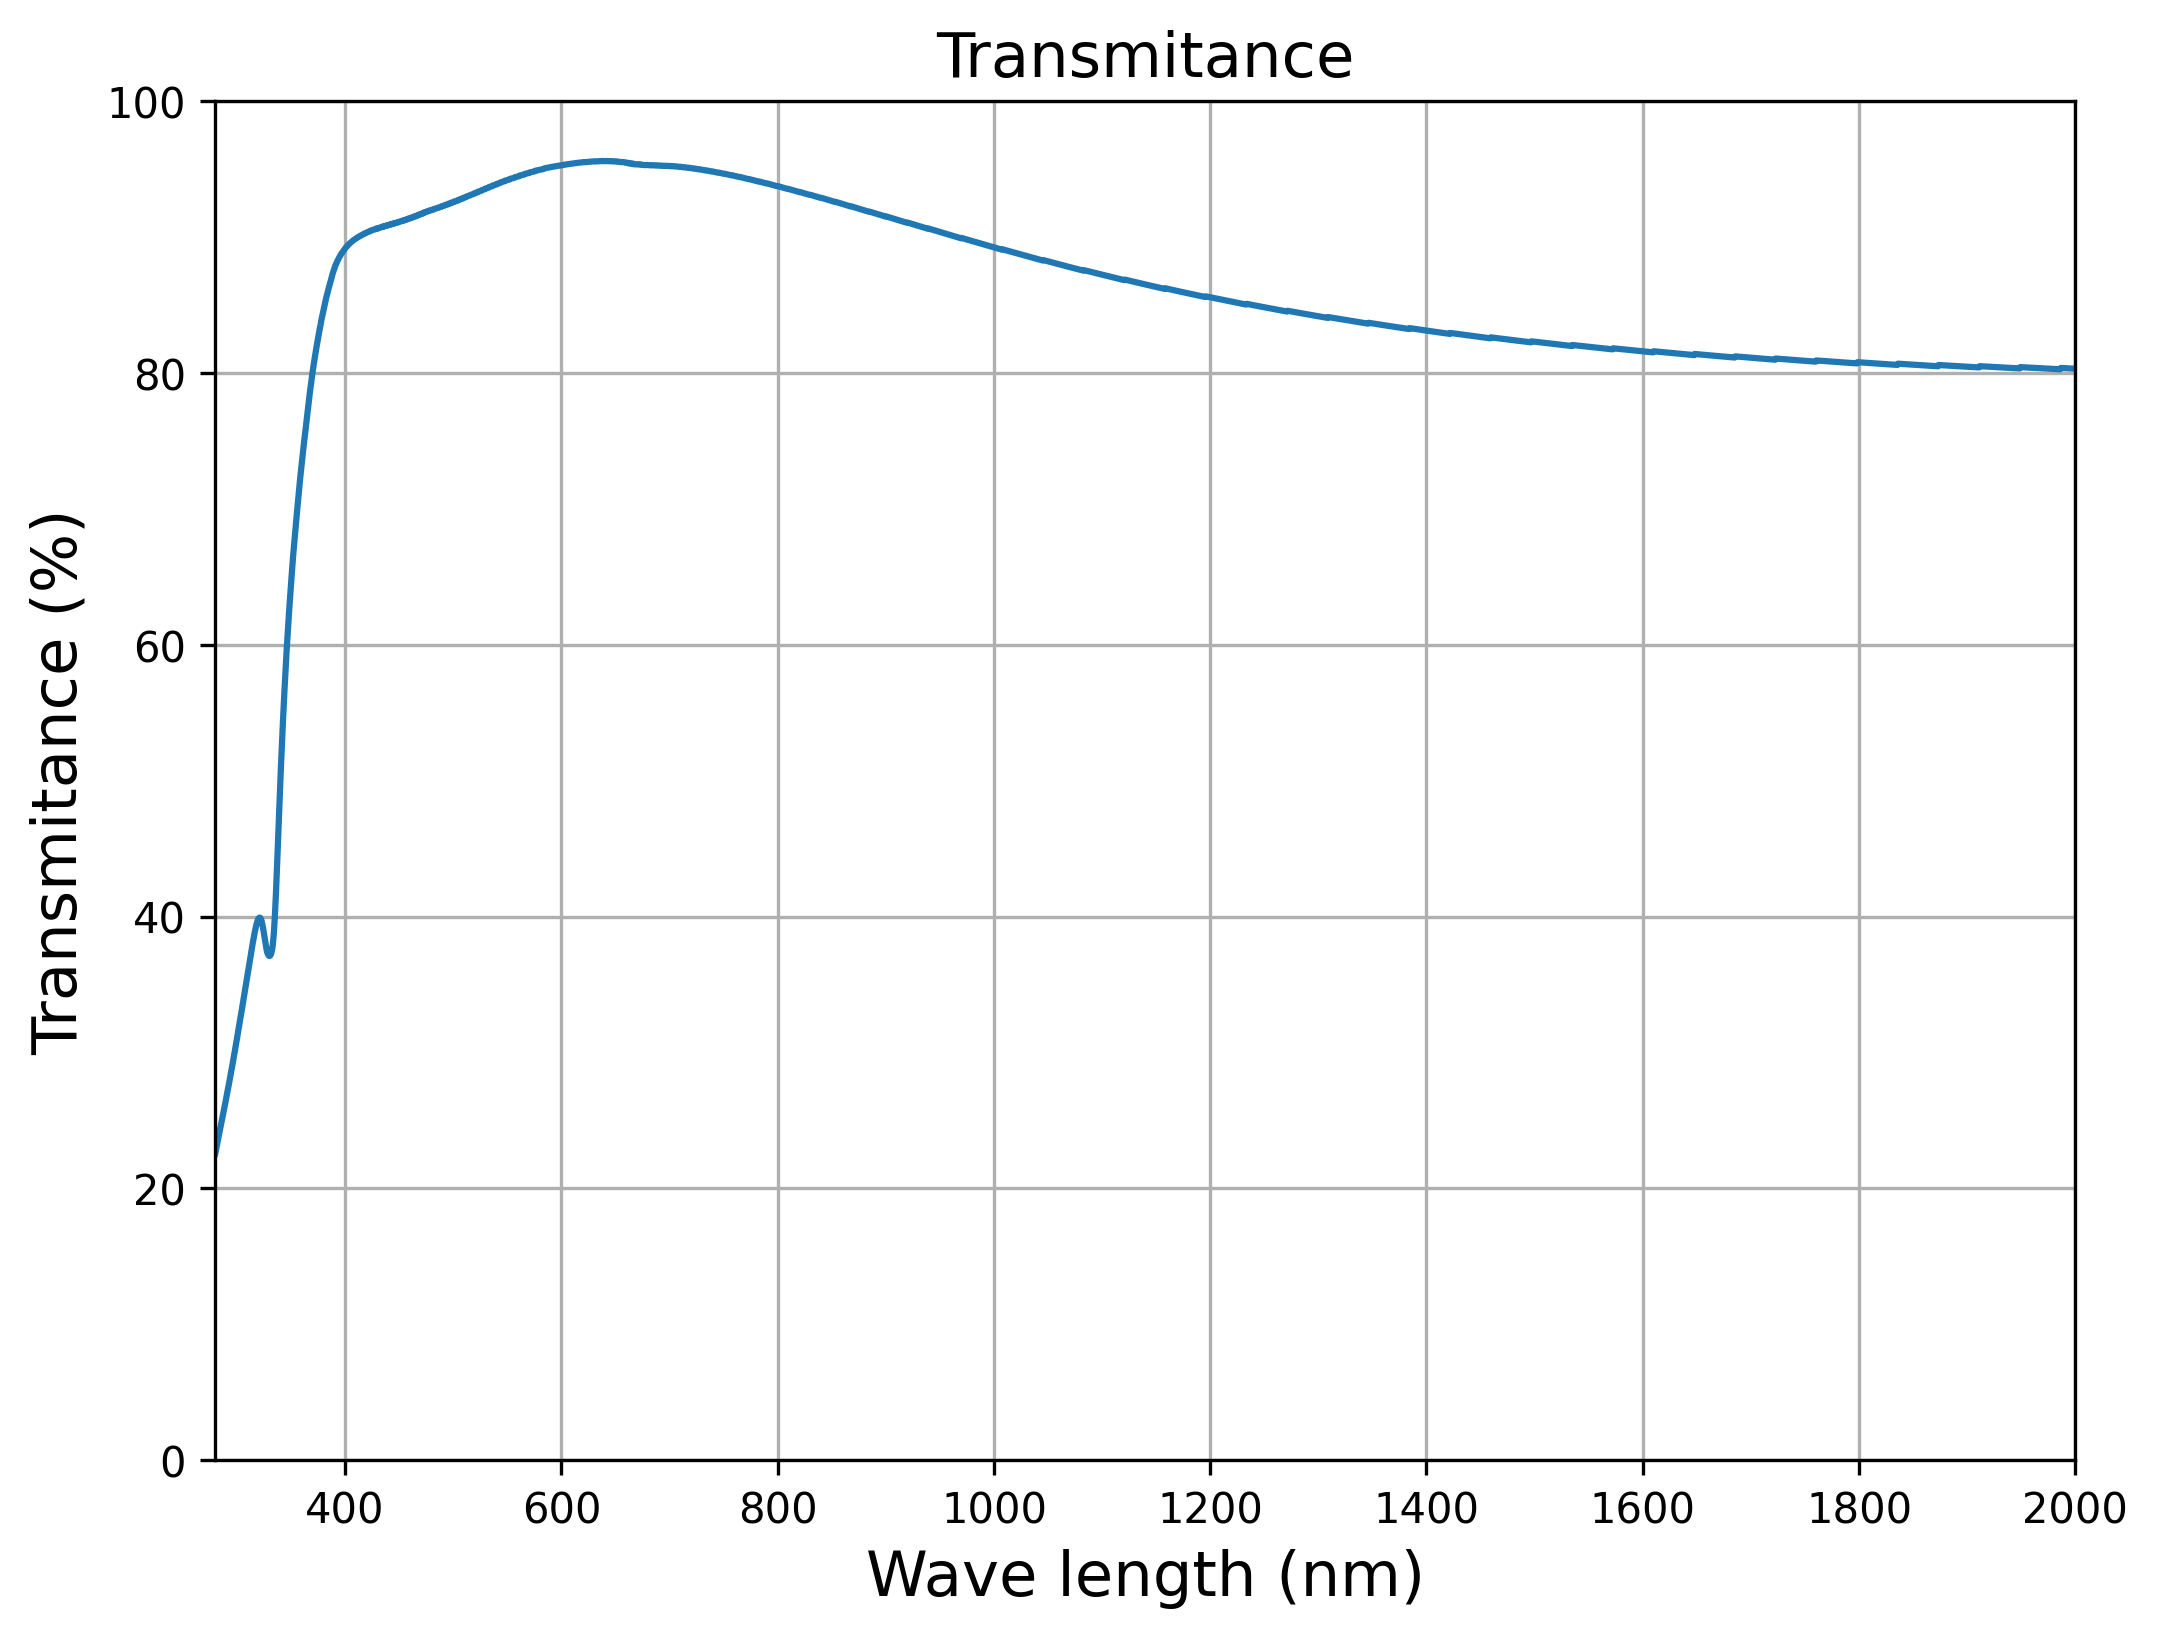

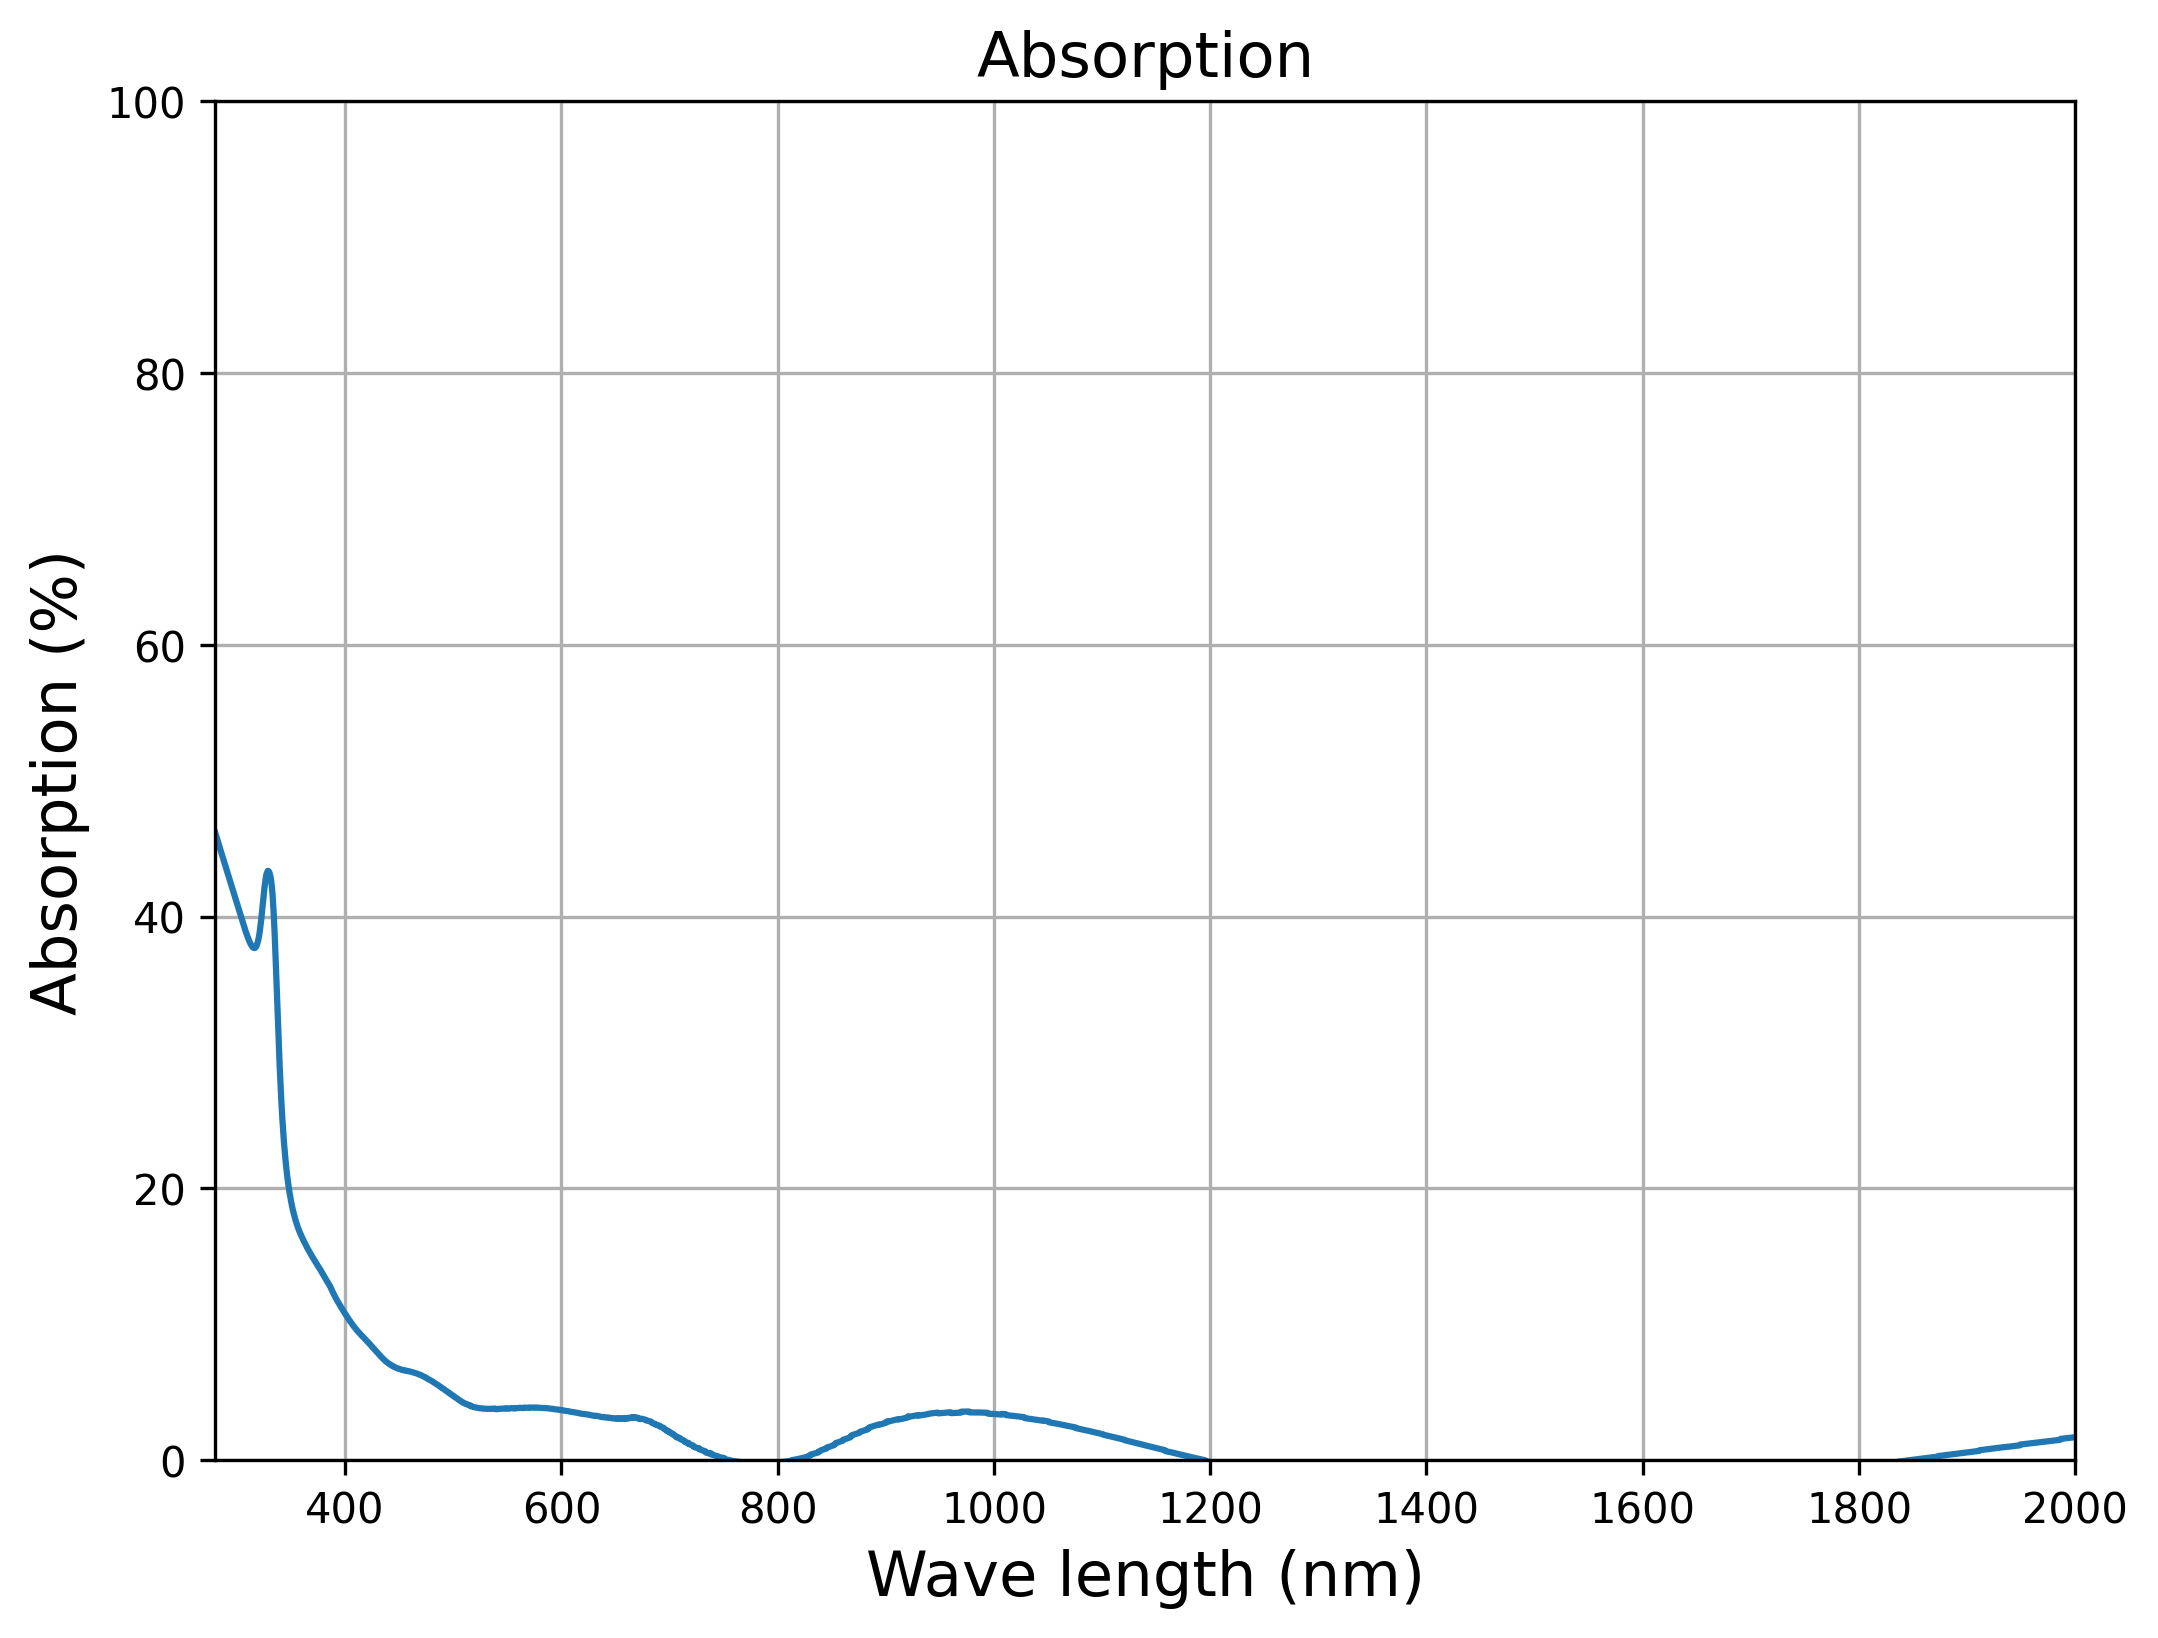

In [15]:
## Operación para cálculo de dos capas


data = np.genfromtxt("./Materials/MgF2.txt")
# tomando datos de el archivo 1 y primera capa, aunque hay mejores maneras de leerlo
lambd = data[:,][:, 0]
# tomando la primera columna de los datos del archivo que es la misma para los demás
n1 = data[:,][:, 1]
# Primer índice de refracción del material 1 de la segunda columna del archivo
k1 = data[:,][:, 2]
# índice de refracción la parte imaginaria (es la parte que absorbe) tercera columna
no = 1
# Este es el índice del material 0 o sea de donde proviene la luz, en este caso, desde el aire
data2 = np.genfromtxt("./Materials/ZnS.txt")
# tomando datos de el archivo 2 y segunda capa, aunque hay mejores maneras de leerlo
n2 = data2[:,][:, 1]
k2 = data2[:,][:, 2]
data3 = np.genfromtxt("./Materials/InGaP.txt")
n3 = data3[:,][:, 1]
k3 = data3[:,][:, 2]
# Se repiten los mismos comentarios

d1 = 97
# Espesor del material 1
d2 = 41
# Espesor del material 2


alpha1 = (2 * np.pi * k1 * d1) / lambd
gamma1 = (2 * np.pi * n1 * d1) / lambd
g1 = ((no ** 2) - (n1 ** 2) - (k1 ** 2)) / (((no + n1) ** 2) + ((k1) * 2))
h1 = (2 * no * k1) / (((no + n1) ** 2) + ((k1) ** 2))
g2 = ((n1 ** 2) - (n2 ** 2) + (k1 ** 2) - (k2 ** 2)) / (
    ((n1 + n2) ** 2) + ((k1 + k2) ** 2)
)
h2 = (2 * (n1 ** (k2) - n2 ** (k1))) / (((n1 + n2) ** 2) + ((k1 + k2) ** 2))
p2 = np.exp(alpha1) * np.cos(gamma1)
q2 = np.exp(alpha1) * np.sin(gamma1)
t2 = np.exp(-alpha1) * (g2 * (np.cos(gamma1)) + (h2) * (np.sin(gamma1)))
u2 = np.exp(-alpha1) * (h2 * (np.cos(gamma1)) - g2 * (np.sin(gamma1)))
# Expresiones utilizadas para calcular p12-q12-t12-u12 que son las que necesitamos

p12 = p2 + (g1 * t2) - h1 * u2
q12 = q2 + (h1 * t2) + g1 * u2
t12 = t2 + (g1 * p2) - h1 * q2
u12 = u2 + (h1 * p2) + g1 * q2
##Fin cálculo 2 capas


########### Cálculo para tres capas
g3 = ((n2 ** 2) - (n3 ** 2) + (k2 ** 2) - (k3 ** 2)) / (
    ((n2 + n3) ** 2) + ((k2 + k3) ** 2)
)
h3 = 2 * (n2 * k3 - n3 * k2) / (((n2 + n3) ** 2) + (k2 + k3) ** 2)
alpha2 = 2 * np.pi * k2 * d2 / lambd
gamma2 = 2 * np.pi * n2 * d2 / lambd
p3 = np.exp(alpha2) * np.cos(gamma2)
q3 = np.exp(alpha2) * np.sin(gamma2)
t3 = np.exp(-alpha2) * (g3 * (np.cos(gamma2)) + h3 * (np.sin(gamma2)))
u3 = np.exp(-alpha2) * (h3 * (np.cos(gamma2)) - g3 * (np.sin(gamma2)))
r2 = np.exp(alpha1) * (g2 * (np.cos(gamma1)) - h2 * (np.sin(gamma1)))
s2 = np.exp(alpha1) * (h2 * (np.cos(gamma1)) + g2 * (np.sin(gamma1)))
v2 = np.exp(-alpha1) * np.cos(gamma1)
w2 = -np.exp(-alpha1) * np.sin(gamma1)


r12 = r2 + g1 * v2 - h1 * w2
s12 = s2 + h1 * v2 + g1 * w2
v12 = v2 + g1 * r2 - h1 * s2
w12 = w2 + h1 * r2 + g1 * s2

p13 = p12 * p3 - q12 * q3 + r12 * t3 - s12 * u3
q13 = q12 * p3 + p12 * q3 + s12 * t3 + r12 * u3
t13 = t12 * p3 - u12 * q3 + v12 * t3 - w12 * u3
u13 = u12 * p3 + t12 * q3 + w12 * t3 + v12 * u3
# Fin cálculo 3 capas


### Inicio cálculo 4 capas
d3 = 200
# Espesor del material 3
d4 = 1100
# Espesor del material 4
data4 = np.genfromtxt("./Materials/GaAs.txt")
n4 = data4[:,][:, 1]
k4 = data4[:,][:, 2]
data5 = np.genfromtxt("./Materials/Si.txt")
n5 = data5[:,][:, 1]
k5 = data5[:,][:, 2]
alpha3 = (2 * np.pi * k3 * d3) / lambd
gamma3 = (2 * np.pi * n3 * d3) / lambd
g4 = ((n3 ** 2) - (n4 ** 2) + (k3 ** 2) - (k4 ** 2)) / (
    ((n3 + n4) ** 2) + ((k3 + k4) ** 2)
)
h4 = 2 * (n3 * k4 - n4 * k3) / (((n3 + n4) ** 2) + (k3 + k4) ** 2)
r3 = np.exp(alpha2) * (g3 * (np.cos(gamma2)) - h3 * (np.sin(gamma2)))
s3 = np.exp(alpha2) * (h3 * (np.cos(gamma2)) + g3 * (np.sin(gamma2)))
v3 = np.exp(-alpha2) * np.cos(gamma2)
w3 = -np.exp(-alpha2) * np.sin(gamma2)
r13 = p12 * r3 - q12 * s3 + r12 * v3 - s12 * w3
alpha4 = 2 * np.pi * k4 * d4 / lambd
gamma4 = 2 * np.pi * n4 * d4 / lambd
p4 = np.exp(alpha3) * np.cos(gamma3)
q4 = np.exp(alpha3) * np.sin(gamma3)
t4 = np.exp(-alpha3) * (g4 * (np.cos(gamma3)) + h4 * (np.sin(gamma3)))
u4 = np.exp(-alpha3) * (h4 * (np.cos(gamma3)) - g4 * (np.sin(gamma3)))

s13 = q12 * r3 + p12 * s3 + s12 * v3 + r12 * w3
v13 = t12 * r3 - u12 * s3 + v12 * v3 - w12 * w3
w13 = u12 * r3 + t12 * s3 + w12 * v3 + v12 * w3


p14 = p13 * p4 - q13 * q4 + r13 * t4 - s13 * u4
q14 = q13 * p4 + p13 * q4 + s13 * t4 + r13 * u4
t14 = t13 * p4 - u13 * q4 + v13 * t4 - w13 * u4
u14 = u13 * p4 + t13 * q4 + w13 * t4 + v13 * u4
### fin cálculo 4 capas


### inicio cálculo 5 capas
g5 = ((n4 ** 2) - (n5 ** 2) + (k4 ** 2) - (k5 ** 2)) / (
    ((n4 + n5) ** 2) + ((k4 + k5) ** 2)
)
h5 = 2 * (n4 * k5 - n5 * k4) / (((n4 + n5) ** 2) + (k4 + k5) ** 2)
p5 = np.exp(alpha4) * np.cos(gamma4)
q5 = np.exp(alpha4) * np.sin(gamma4)
t5 = np.exp(-alpha4) * (g5 * (np.cos(gamma4)) + h5 * (np.sin(gamma4)))
u5 = np.exp(-alpha4) * (h5 * (np.cos(gamma4)) - g5 * (np.sin(gamma4)))
r4 = np.exp(alpha3) * (g4 * (np.cos(gamma3)) - h4 * (np.sin(gamma3)))
s4 = np.exp(alpha3) * (h4 * (np.cos(gamma3)) + g4 * (np.sin(gamma3)))
v4 = np.exp(-alpha3) * np.cos(gamma3)
w4 = -np.exp(-alpha3) * np.sin(gamma3)

r14 = p13 * r4 - q13 * s4 + r13 * v4 - s13 * w4
s14 = q13 * r4 + p13 * s4 + s13 * v4 + r13 * w4
v14 = t13 * r4 - u13 * s4 + v13 * v4 - w13 * w4
w14 = u13 * r4 + t13 * s4 + w13 * v4 + v13 * w4

p15 = p14 * p5 - q14 * q5 + r14 * t5 - s14 * u5
q15 = q14 * p5 + p14 * q5 + s14 * t5 + r14 * u5
t15 = t14 * p5 - u14 * q5 + v14 * t5 - w14 * u5
u15 = u14 * p5 + t14 * q5 + w14 * t5 + v14 * u5
## fin cálculo 5 capas


l13 = (
    (1 + g1) * (1 + g2) * (1 + g3)
    - h2 * h3 * (1 + g1)
    - h3 * h1 * (1 + g2)
    - h1 * h2 * (1 + g3)
)
m13 = (
    h1 * (1 + g2) * (1 + g3)
    + h2 * (1 + g3) * (1 + g1)
    + h3 * (1 + g1) * (1 + g2)
    - h1 * h2 * h3
)

### Cálculo más importante!!!!
R = ((t14 ** 2) + (u14 ** 2)) / ((p14 ** 2) + (q14 ** 2)) * 100
### fin cálculo más importante

T = (n3 / no) * ((l13 ** 2) + (m13 ** 2)) / ((p13 ** 2) + (q13 ** 2)) * 100

Abs = 100 - (R + T)

# export data
#mydata = np.stack((lambd, R, T, Abs), axis=-1)
#np.savetxt("97-41.txt", mydata)

plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(lambd, R)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Reflectance (%)", {"fontsize": 15})
plt.title("Reflectance", {"fontsize": 15})
plt.axis([280, 2000, 0, 100])
# plt.suptitle('Cálculos InGaP', fontsize=16)
plt.grid(True)
#plt.savefig("Reflectance.pdf")
#plt.show()


plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(lambd, T)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Transmitance (%)", {"fontsize": 15})
plt.title("Transmitance", {"fontsize": 15})
plt.grid(True)
plt.axis([280, 2000, 0, 100])

#plt.savefig("Transmittance.pdf")
# plt.show()

plt.figure(figsize=(8, 6), dpi=300, facecolor="w", edgecolor="k")
plt.plot(lambd, Abs)
plt.xlabel("Wave length (nm)", {"fontsize": 15})
plt.ylabel("Absorption (%)", {"fontsize": 15})
plt.title("Absorption", {"fontsize": 15})
plt.grid(True)
plt.axis([280, 2000, 0, 100])
#plt.savefig("Absorption.pdf")

# plt.subplots_adjust(left=0.2, wspace=0.5, top=0.8, hspace=0.8)

# plt.show()
